In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from collections import Counter
import nltk
from nltk.corpus import stopwords
import os

# Load dataset
#Mount Google Drive
from google.colab import drive
drive.mount('/content/drive')

#file path
file_path = '/content/drive/My Drive/Colab dataset/fake reviews dataset.csv'

# read csv file dataset

df = pd.read_csv(file_path)

df['review_length'] = df['text_'].str.len()  # Create a column for review length

# Preprocess text (Lowercase, remove punctuation)
df['text'] = df['text_'].str.lower().str.replace(r'[^\w\s]', '', regex=True)

Mounted at /content/drive


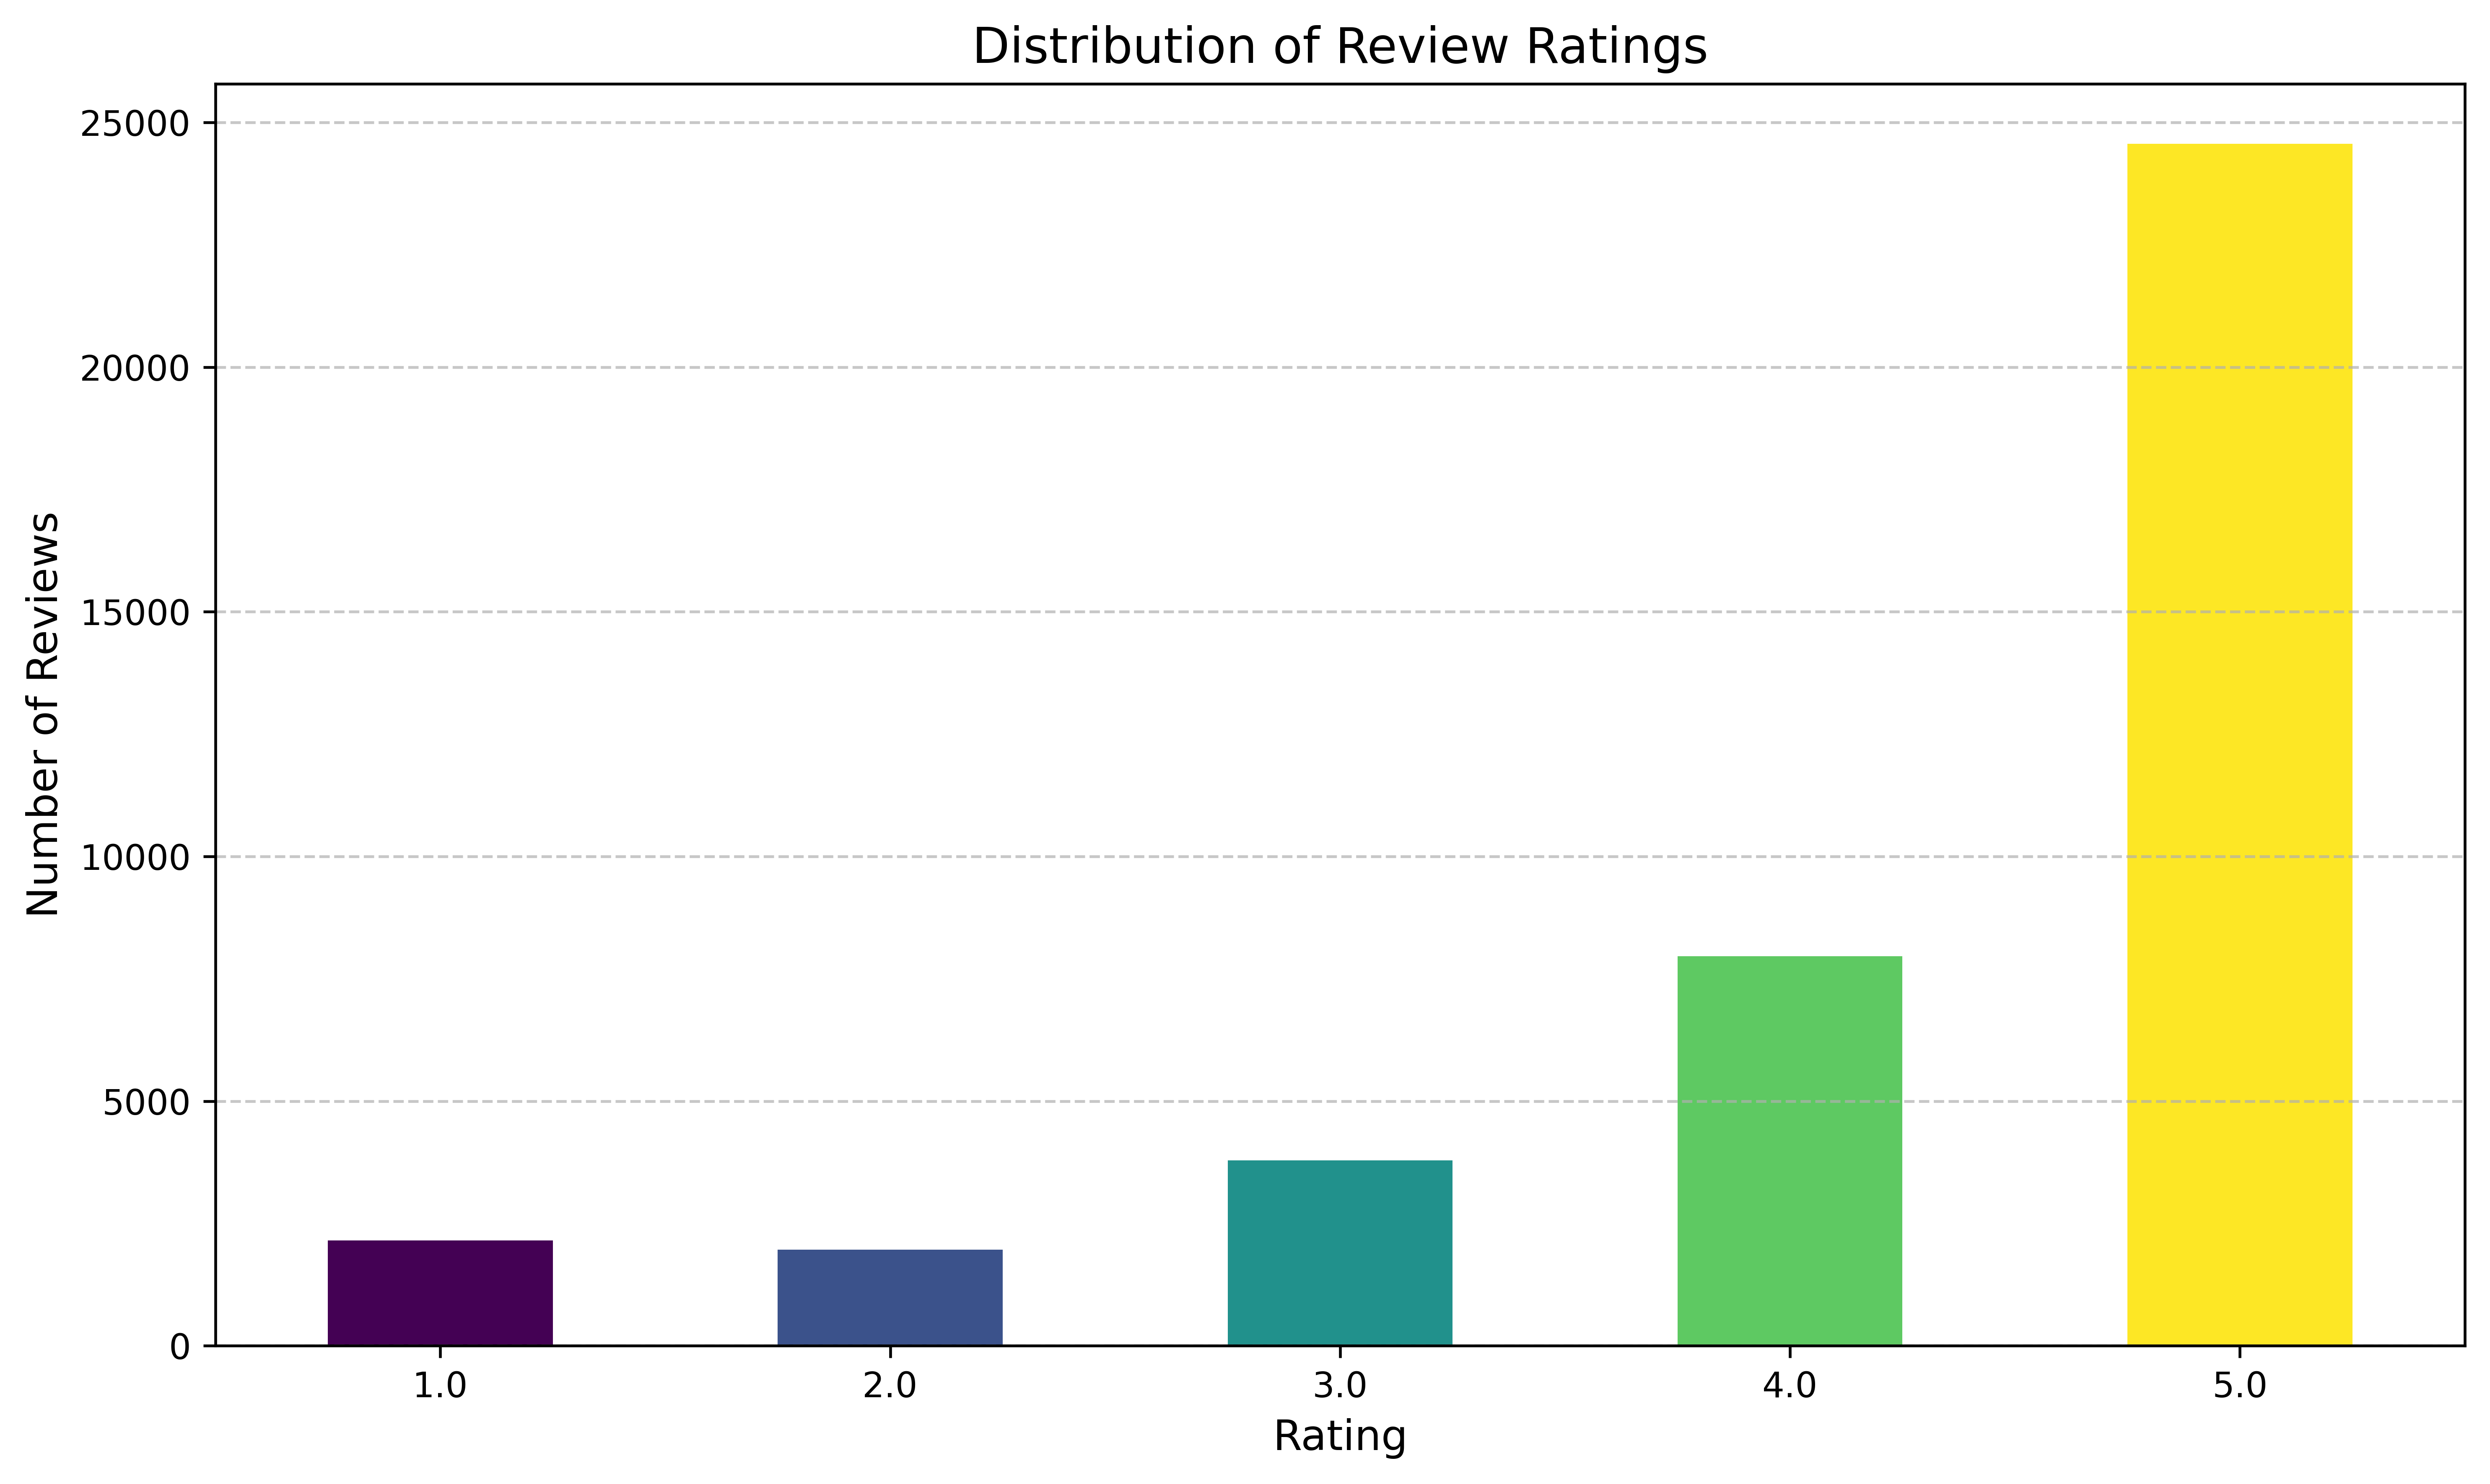

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd


# Prepare data
ratings_counts = df['rating'].value_counts().sort_index()

# Start plotting
plt.figure(figsize=(10, 6), dpi=600)

# Generate a color for each unique rating using a colormap
colors = plt.cm.viridis(np.linspace(0, 1, len(ratings_counts)))

# Plot with unique colors for each bar
ratings_counts.plot(kind='bar', color=colors)

# Adding customizations
plt.title('Distribution of Review Ratings', fontsize=14)
plt.xlabel('Rating', fontsize=12)
plt.ylabel('Number of Reviews', fontsize=12)
plt.xticks(rotation=0)  # Keeps the x-ticks labels horizontal
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Improve layout
plt.tight_layout()

# Show plot
plt.show()


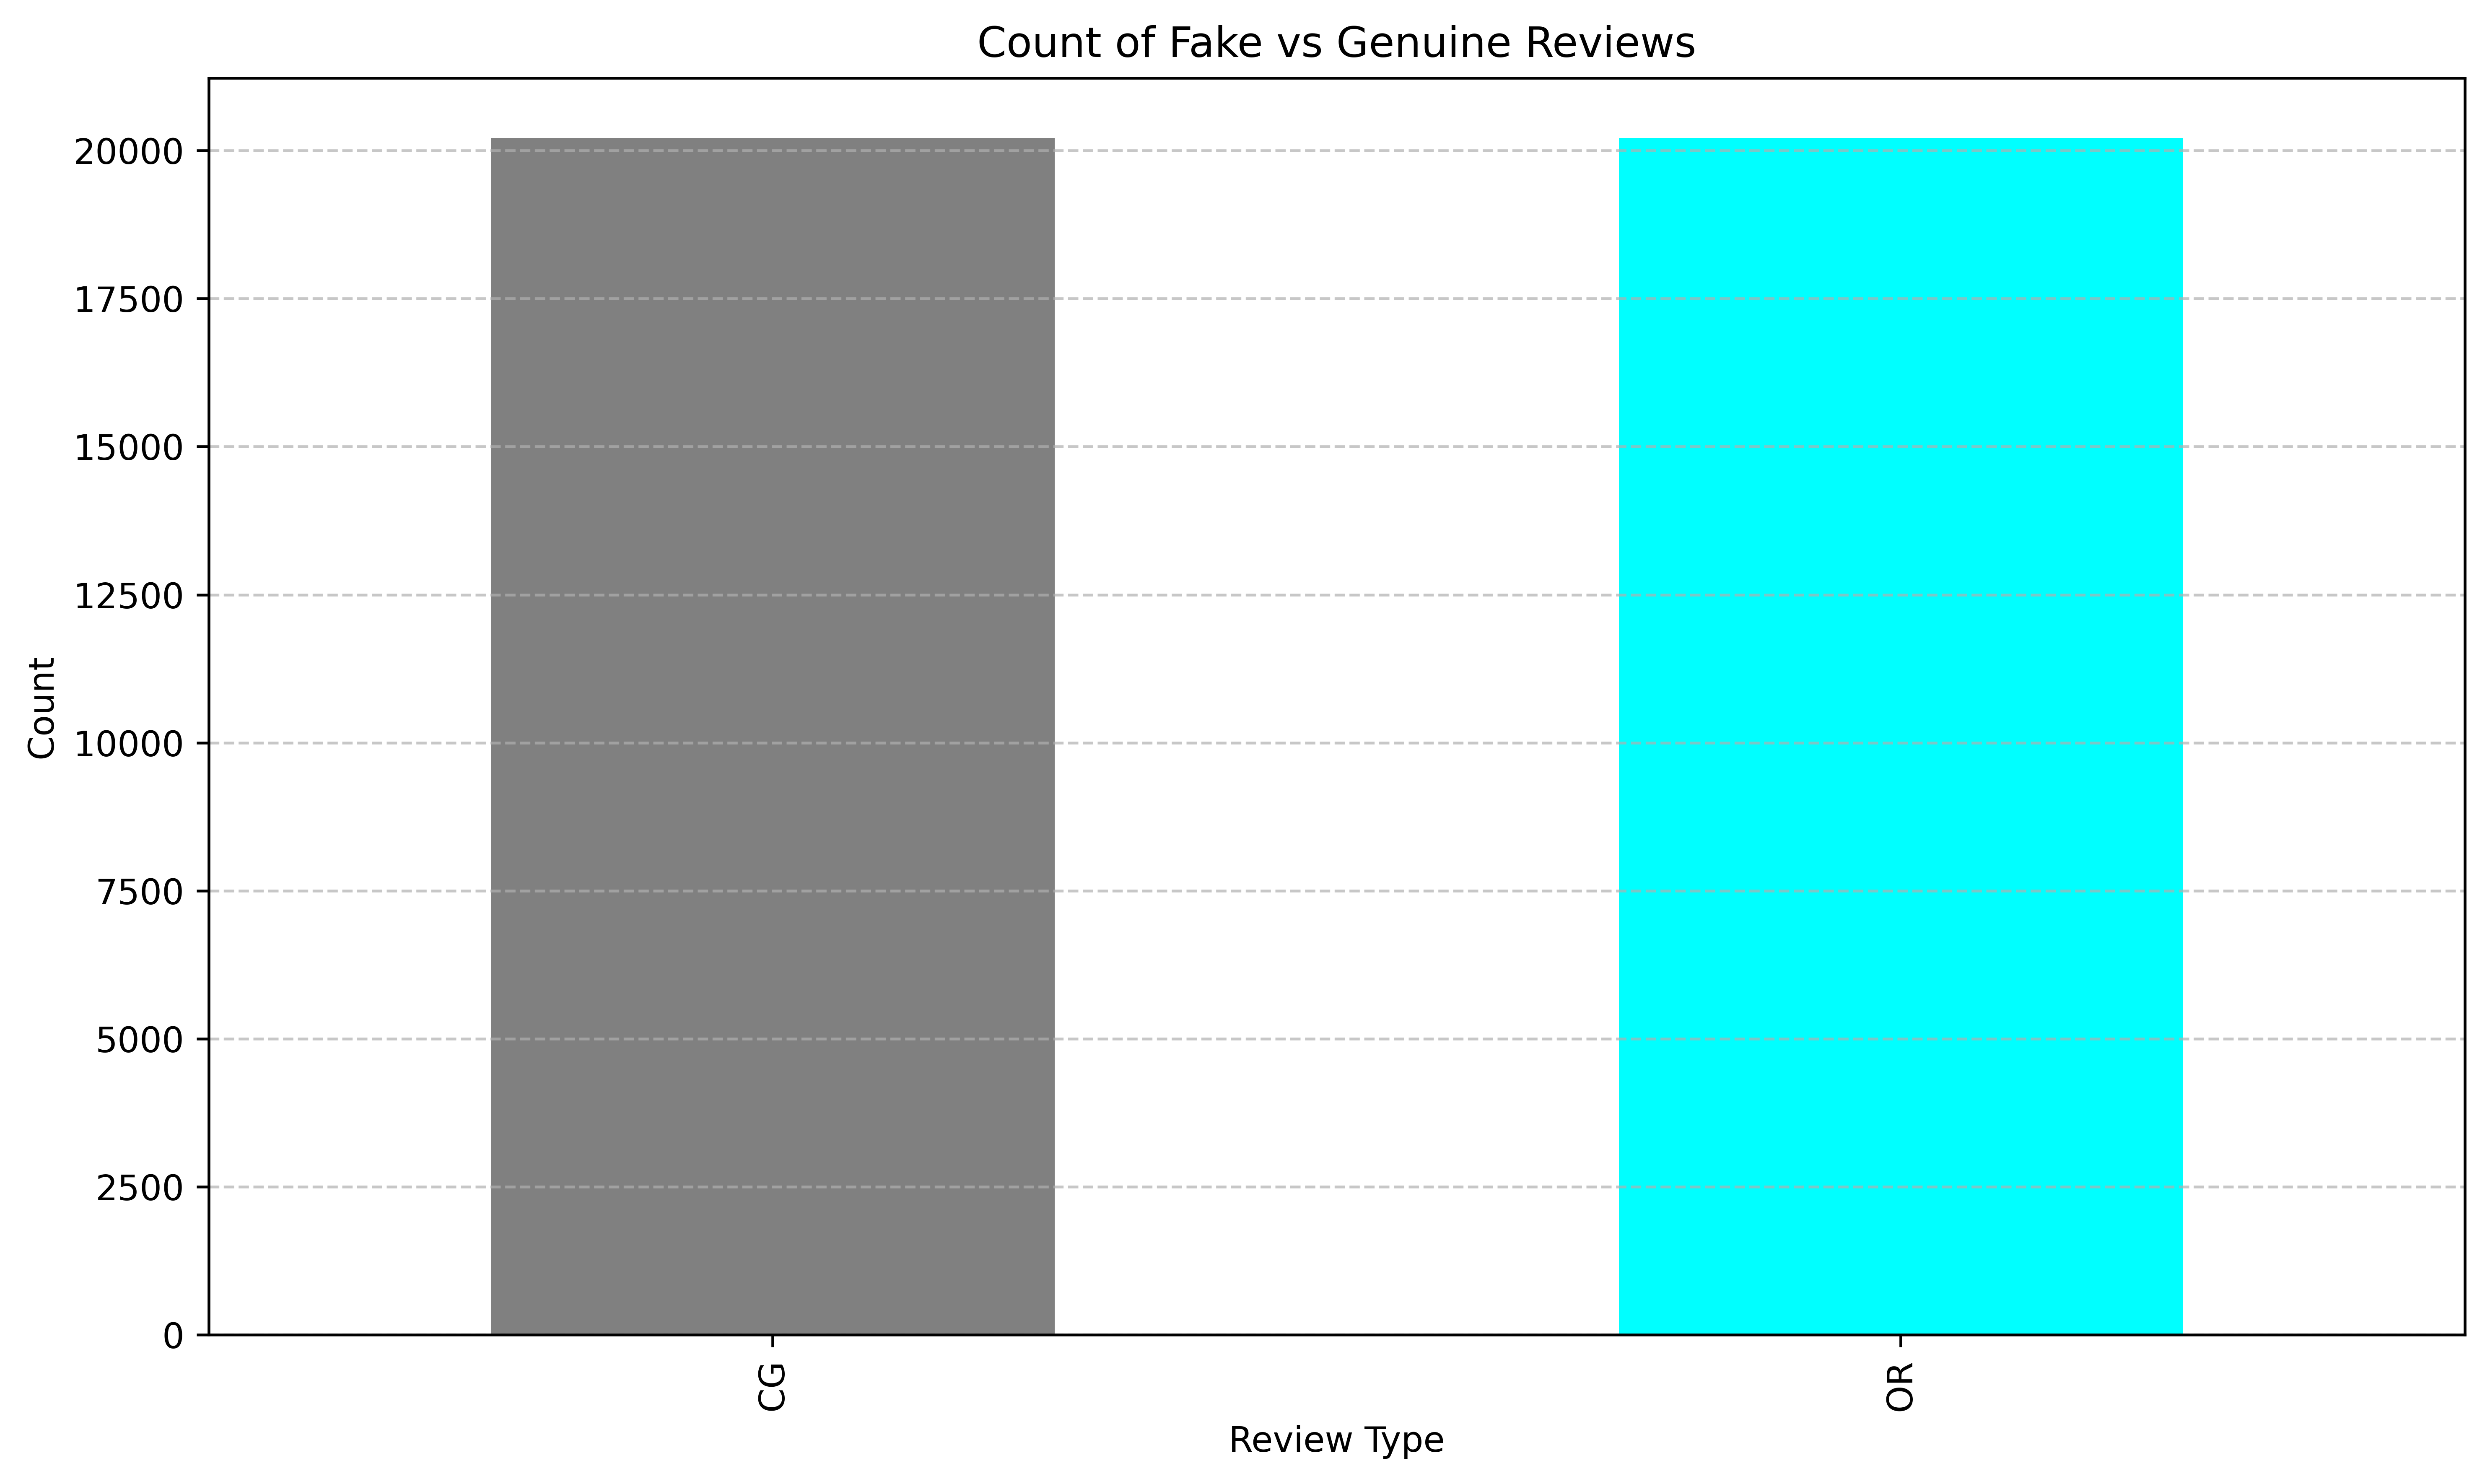

In [ ]:
plt.figure(figsize=(10, 6), dpi=600)
df['label'].value_counts().plot(kind='bar', color=['gray', 'cyan'])
plt.title('Count of Fake vs Genuine Reviews')
plt.xlabel('Review Type')
plt.ylabel('Count')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


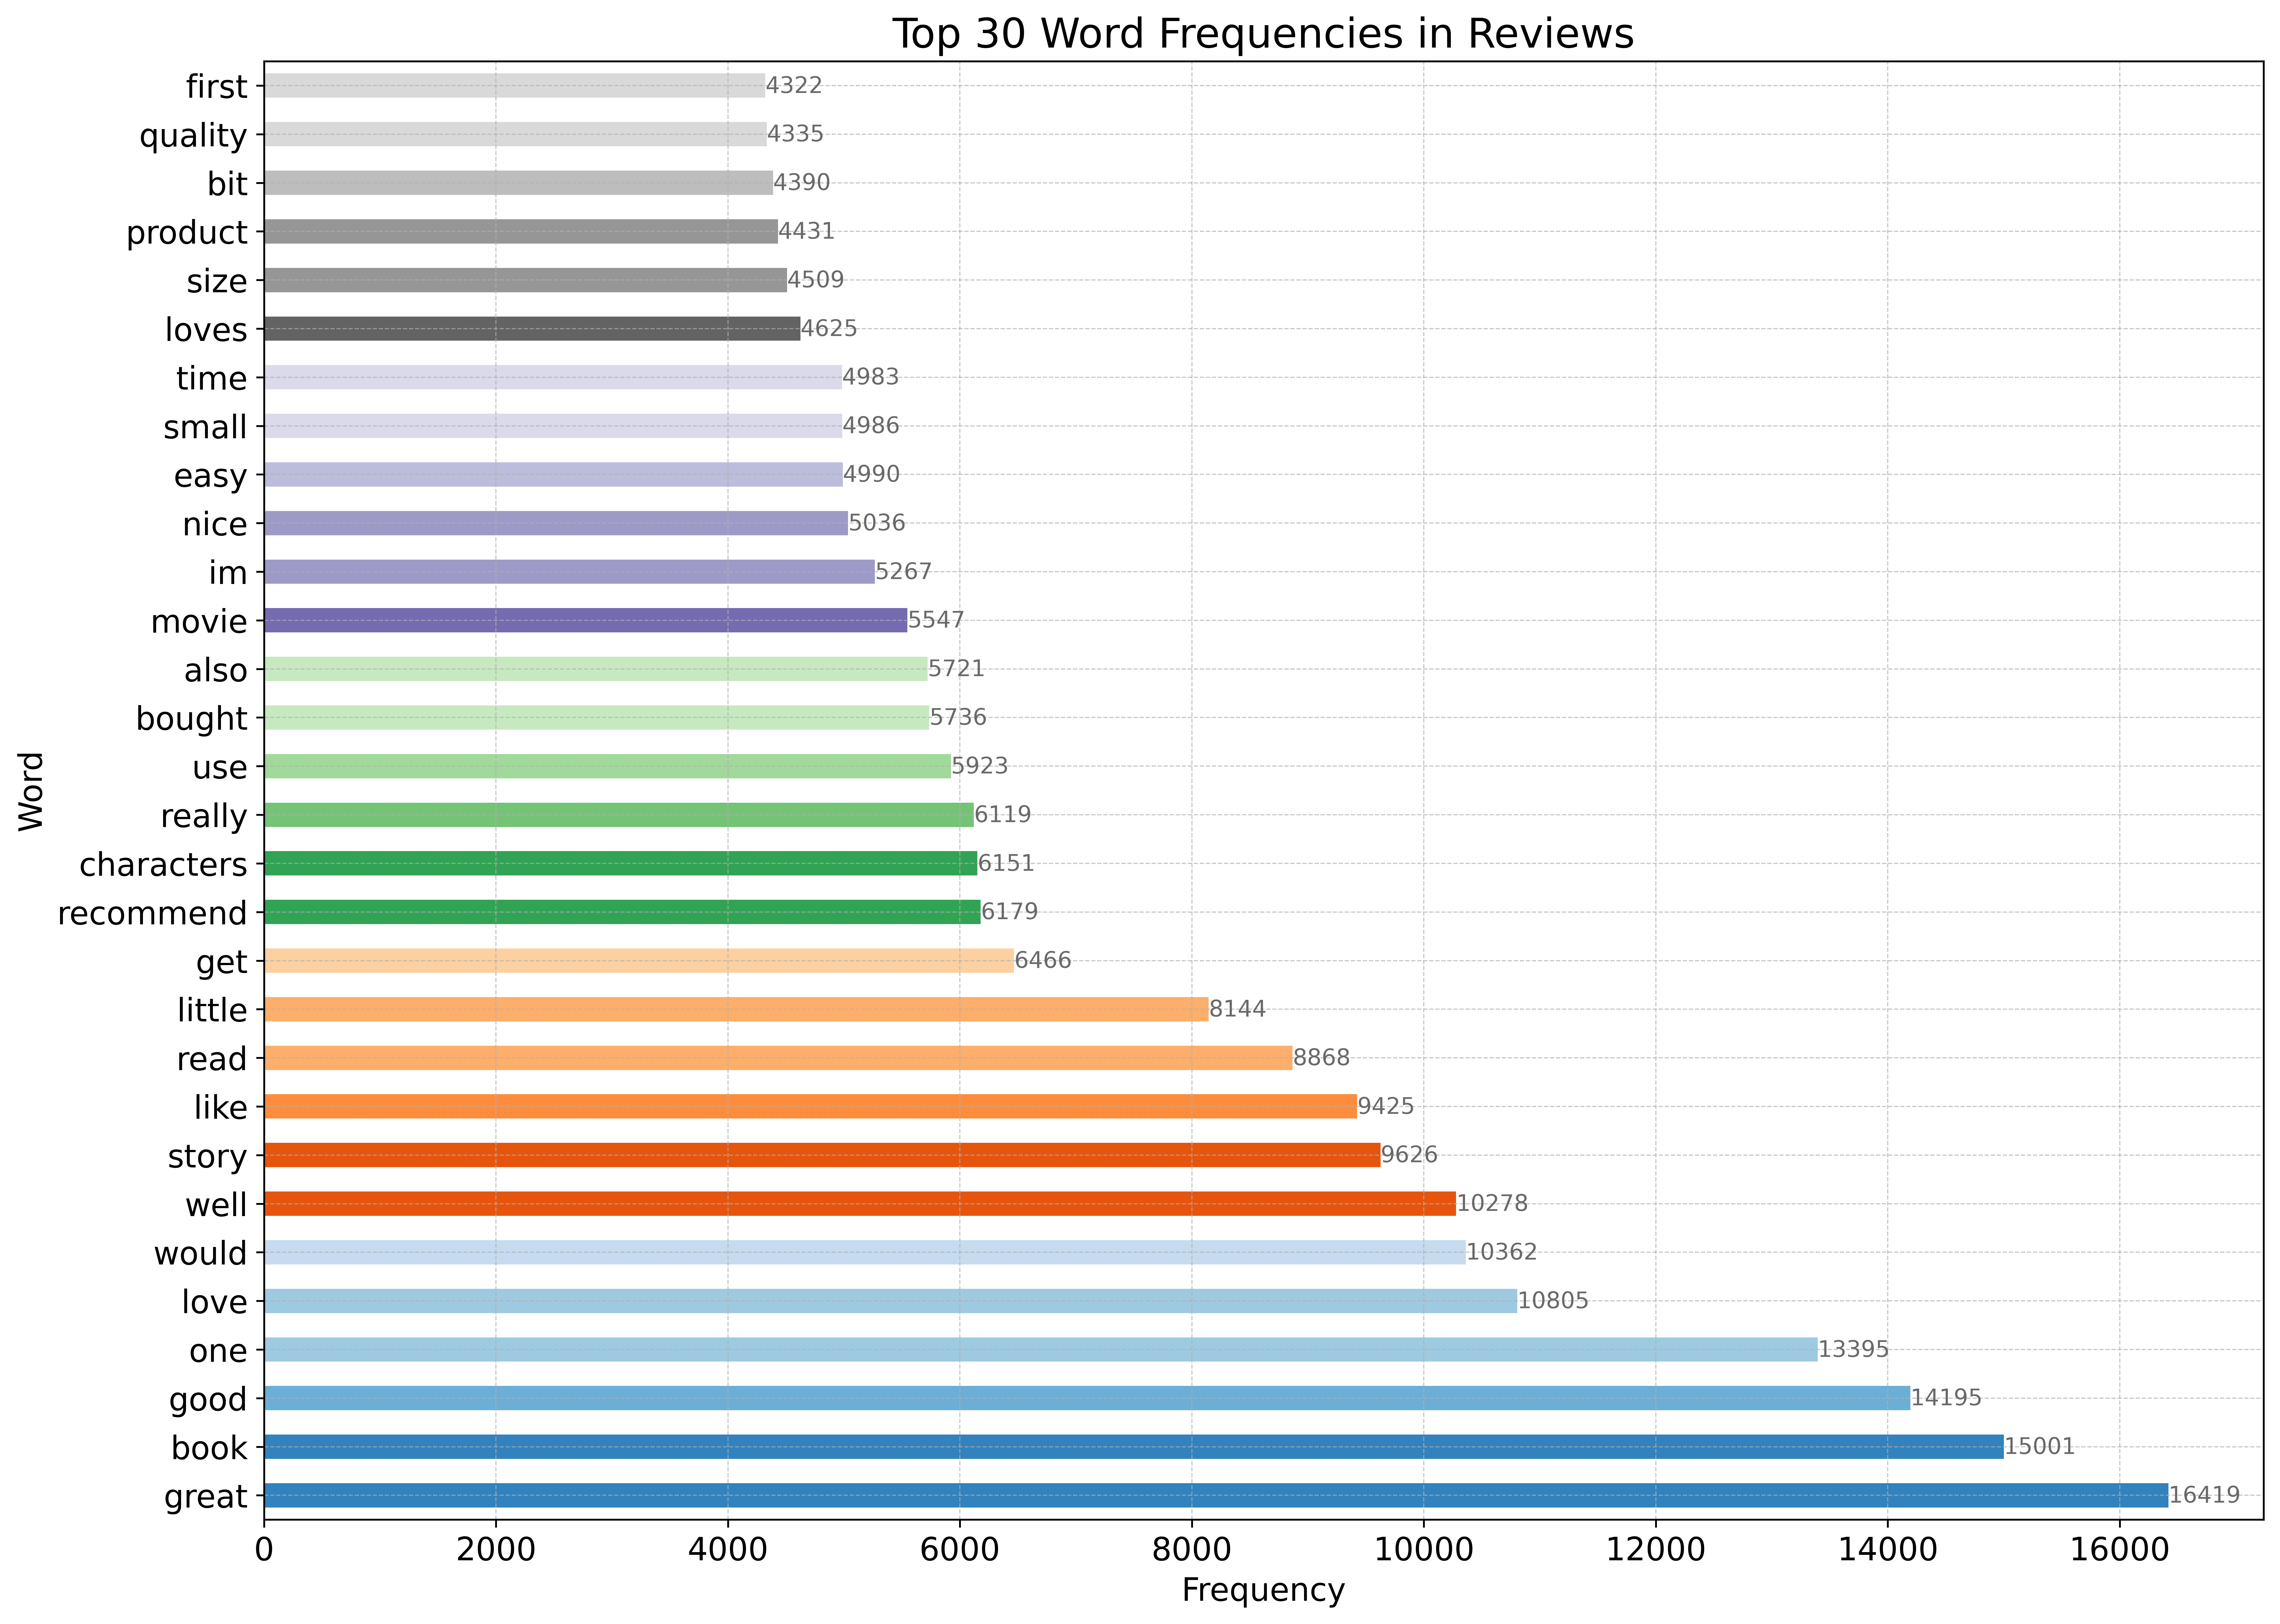

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd
from collections import Counter
import numpy as np
import nltk
import string

from nltk.corpus import stopwords

nltk.download('stopwords')

# Define the stopwords set
stop_words = set(stopwords.words('english'))

# Function to preprocess text
def preprocess_text(text):
    # Remove punctuation
    text = text.translate(str.maketrans('', '', string.punctuation))
    # Convert text to lowercase and split into words
    words = text.lower().split()
    # Remove stopwords
    words = [word for word in words if word not in stop_words]
    return words

# Apply preprocessing function to the text column
df['processed_text'] = df['text_'].apply(preprocess_text)

# Flatten the list of lists
words = [word for sublist in df['processed_text'] for word in sublist]

# Generate word counts
word_counts = Counter(words)

# Create DataFrame for plotting
data_for_plotting = pd.DataFrame(word_counts.most_common(30), columns=['Word', 'Frequency']).set_index('Word')

# Start plotting
plt.figure(figsize=(14, 10), dpi=600)  # Larger figure size for better readability

# Get a color map
cmap = plt.get_cmap("tab20c")  # This colormap has 20 cyclic colors

# Create horizontal bar plot with colors
ax = data_for_plotting['Frequency'].plot(kind='barh', color=[cmap(i) for i in np.linspace(0, 1, data_for_plotting.shape[0])], fontsize=14)

# Add grid
ax.grid(True, linestyle='--', linewidth=0.5, alpha=0.7)

# Set title and labels with increased font sizes
ax.set_title('Top 30 Word Frequencies in Reviews', fontsize=18)
ax.set_xlabel('Frequency', fontsize=14)
ax.set_ylabel('Word', fontsize=14)

# Add data labels to each bar for direct readability
for i in ax.patches:
    ax.text(i.get_width() + 0.3, i.get_y() + 0.1, str(round((i.get_width()), 2)), fontsize=10, color='dimgrey')

# Tight Layout to ensure no clipping of tick-labels
plt.tight_layout()

# Show plot
plt.show()


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...


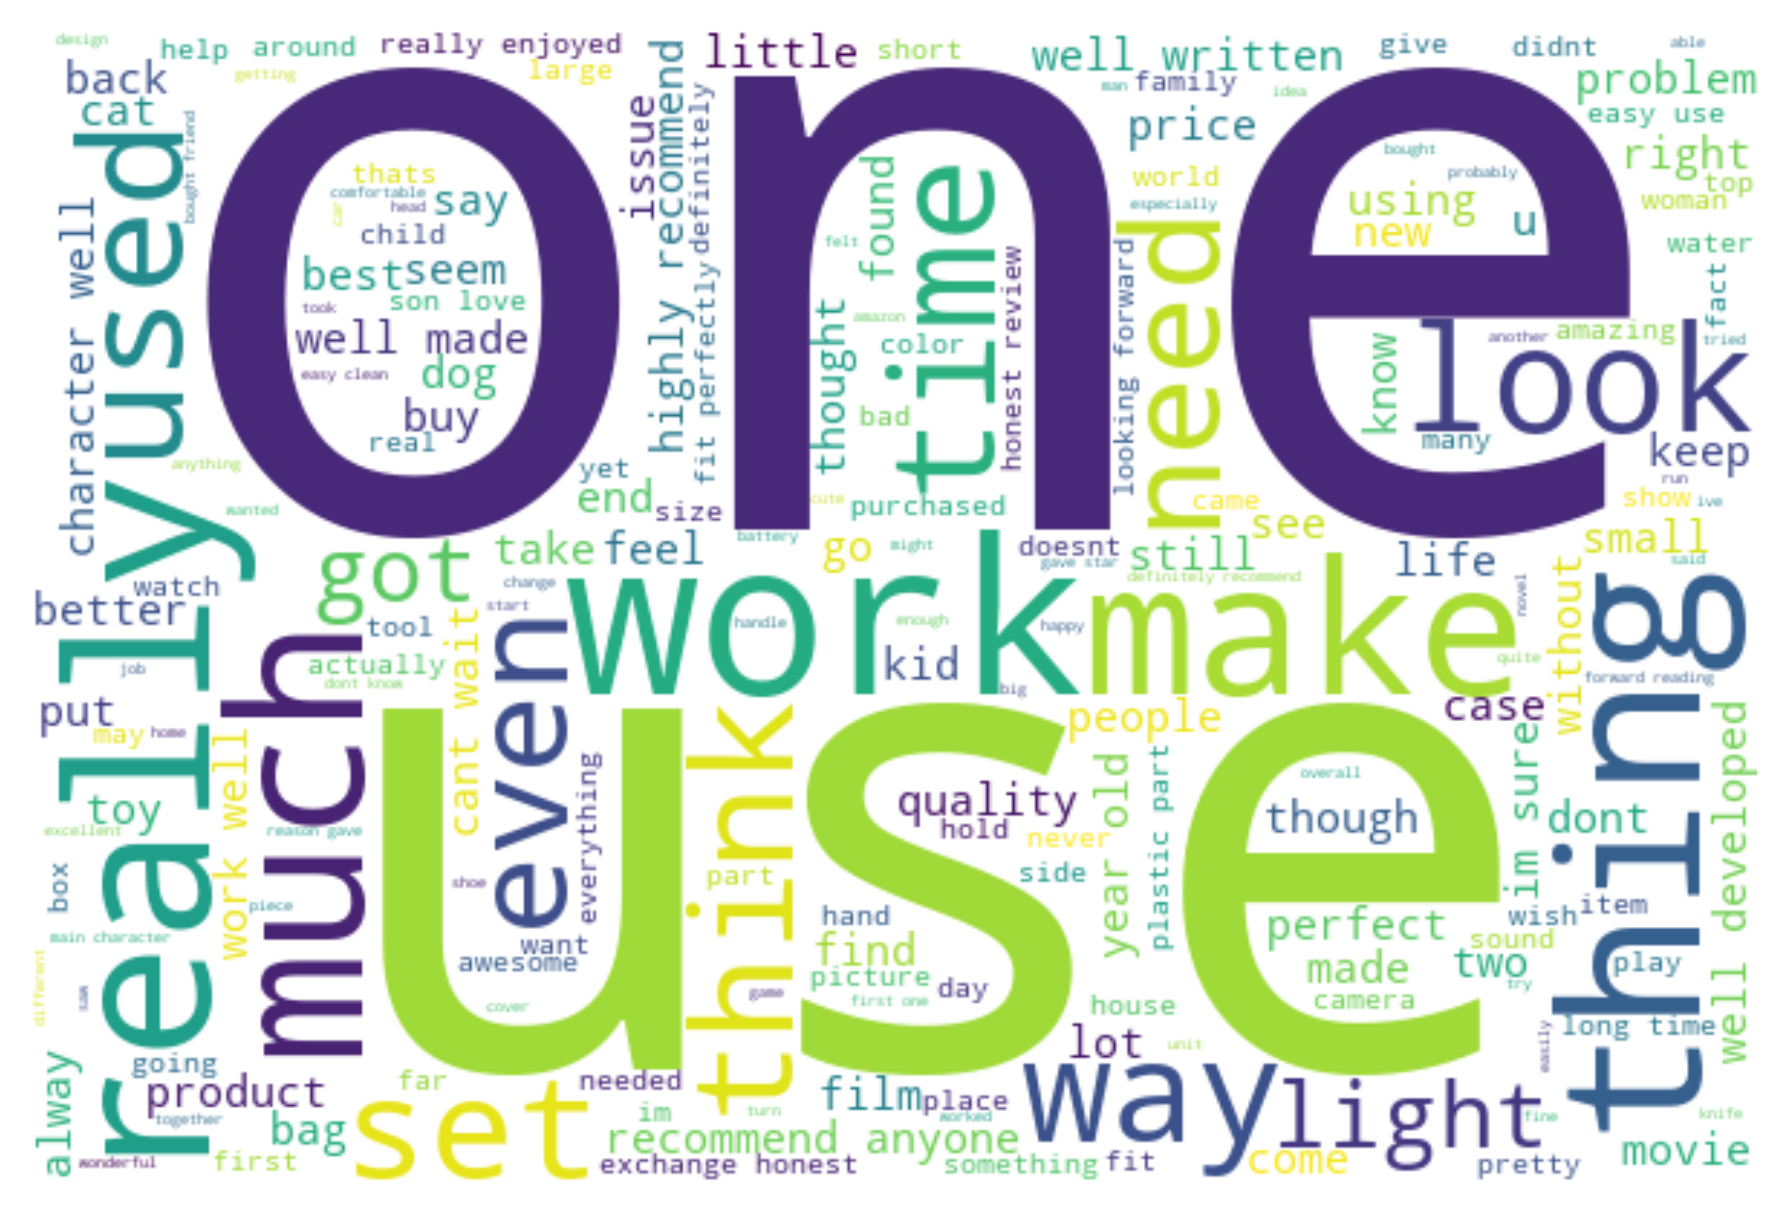

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from wordcloud import WordCloud
import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
import string

# Download necessary NLTK datasets
nltk.download('stopwords')
nltk.download('wordnet')

# Define the file path
file_path = '/content/drive/My Drive/Colab dataset/fake reviews dataset.csv'

# Define chunk size
chunk_size = 10000

# Advanced text preprocessing function
def advanced_preprocess_text(text):
    # Convert text to lowercase
    text = text.lower()
    # Remove punctuation and numbers
    text = ''.join([char for char in text if char.isalpha() or char.isspace()])
    # Remove common and domain-specific stopwords
    general_stopwords = set(stopwords.words('english'))
    domain_specific_stopwords = {'great', 'good', 'book', 'love', 'story', 'nice'}
    all_stopwords = general_stopwords.union(domain_specific_stopwords)
    words = [word for word in text.split() if word not in all_stopwords]
    # Lemmatization to reduce words to their base form
    lemmatizer = WordNetLemmatizer()
    words = [lemmatizer.lemmatize(word) for word in words]
    return ' '.join(words)

# Initialize an empty list to hold all processed text
all_processed_text = []

# Read the dataset in chunks
for chunk in pd.read_csv(file_path, chunksize=chunk_size):
    # Apply advanced preprocessing to the text column
    chunk['text_processed'] = chunk['text_'].apply(advanced_preprocess_text)
    # Collect the processed text
    all_processed_text.extend(chunk['text_processed'])

# Combine all processed text to create one large string
combined_text = ' '.join(all_processed_text)


# Generate a word cloud
wordcloud = WordCloud(width=600, height=400, background_color='white', max_words=200).generate(combined_text)

# Display the word cloud using matplotlib
plt.figure(figsize=(10, 5), dpi=300)  # Adjusted DPI to be less intensive
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')  # No axis details
plt.show()


## CNN with SOGCO

### Loading and Preprocessing Data & Importing Libraries

In [ ]:
import numpy as np
import pandas as pd
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from sklearn.preprocessing import LabelEncoder, StandardScaler
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Embedding, Conv1D, MaxPooling1D, Flatten, Dense, Concatenate
from sklearn.metrics import accuracy_score, confusion_matrix, roc_curve, auc, precision_recall_curve
from sklearn.model_selection import KFold
import matplotlib.pyplot as plt
import string
import nltk

# Load NLTK resources
nltk.download('stopwords')
stop_words = set(stopwords.words('english'))
stemmer = PorterStemmer()

# Load dataset
# read csv file dataset
df = pd.read_csv(file_path)


# Function to preprocess text
def preprocess_text(text):
    text = text.lower()  # Convert to lowercase
    text = text.translate(str.maketrans('', '', string.punctuation))  # Remove punctuation
    words = text.split()
    filtered_words = [stemmer.stem(word) for word in words if word not in stop_words]  # Remove stopwords and stem
    return ' '.join(filtered_words)

# Preprocess the review texts
df['processed_text'] = df['text_'].apply(preprocess_text)


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


### Tokenize and Pad Sequences

In [ ]:
# Tokenization and padding
tokenizer = Tokenizer(num_words=10000)
tokenizer.fit_on_texts(df['processed_text'])
sequences = tokenizer.texts_to_sequences(df['processed_text'])
padded_sequences = pad_sequences(sequences, maxlen=900)


### Encode Labels and Standardize Additional Features

In [ ]:
# Label encoding
label_encoder = LabelEncoder()
encoded_labels = label_encoder.fit_transform(df['label'])
binary_labels = to_categorical(encoded_labels)

# Additional features
df['review_length'] = df['text_'].apply(len)
df['word_count'] = df['text_'].apply(lambda x: len(x.split()))

# Standardize these new features
scaler = StandardScaler()
df[['review_length', 'word_count']] = scaler.fit_transform(df[['review_length', 'word_count']])

# Convert to numpy array for model input
additional_features = np.array(df[['review_length', 'word_count']])


### Define Model Creation Function

In [ ]:
# Function to create the model
def create_model(params):
    # Text input
    text_input = Input(shape=(900,), name='text_input')
    embedding_layer = Embedding(input_dim=10000, output_dim=params['embedding_dim'], input_length=900)(text_input)
    conv_layer = Conv1D(filters=params['filters'], kernel_size=(params['kernel_size'],), activation='relu')(embedding_layer)
    pooling_layer = MaxPooling1D(pool_size=2)(conv_layer)
    flatten_layer = Flatten()(pooling_layer)

    # Additional features input
    features_input = Input(shape=(2,), name='features_input')

    # Concatenate text and additional features
    concatenated = Concatenate()([flatten_layer, features_input])

    # Dense layers
    dense_layer_1 = Dense(params['dense_neurons'], activation='relu')(concatenated)
    dense_layer_2 = Dense(32, activation='relu')(dense_layer_1)
    output_layer = Dense(2, activation='softmax')(dense_layer_2)

    # Create model
    model = Model(inputs=[text_input, features_input], outputs=output_layer)
    model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

    return model


### Training through K-Fold

In [ ]:
# Function to evaluate the model using k-fold cross-validation
def evaluate_model_kfold(params, k=3):
    kf = KFold(n_splits=k, shuffle=True, random_state=42)
    accuracies = []

    for train_index, val_index in kf.split(padded_sequences):
        x_train_sequences, x_val_sequences = padded_sequences[train_index], padded_sequences[val_index]
        x_train_features, x_val_features = additional_features[train_index], additional_features[val_index]
        y_train, y_val = binary_labels[train_index], binary_labels[val_index]

        model = create_model(params)
        model.fit(
            [x_train_sequences, x_train_features],
            y_train,
            epochs=3,  # Reduced epochs for faster evaluation
            batch_size=32,
            verbose=0
        )
        y_pred_probs = model.predict([x_val_sequences, x_val_features])
        y_pred = np.argmax(y_pred_probs, axis=1)
        y_true = np.argmax(y_val, axis=1)
        accuracies.append(accuracy_score(y_true, y_pred))

    return np.mean(accuracies)


###SOGCO Implementation

In [ ]:
import numpy as np

# Genetic Algorithm parameters
population_size = 5
generations = 5
base_mutation_rate = 0.1

# Initialize sub-populations
embedding_dim_pop = np.random.choice([50, 100], population_size).tolist()
filters_pop = np.random.choice([32, 64], population_size).tolist()
kernel_size_pop = np.random.choice([3, 5], population_size).tolist()
dense_neurons_pop = np.random.choice([10, 40], population_size).tolist()

best_params = {}
best_fitness = 0

# Function to create an individual from sub-populations
def create_individual(embedding_dim, filters, kernel_size, dense_neurons):
    return {
        'embedding_dim': embedding_dim,
        'filters': filters,
        'kernel_size': kernel_size,
        'dense_neurons': dense_neurons
    }

# Function to calculate diversity (variance) in a population
def calculate_diversity(population):
    return np.var(population)

# Function for cooperative co-evolution: Divide population into sub-populations based on a key
def divide_population(population, key):
    sub_population = {}
    for idx, value in enumerate(population):
        if value not in sub_population:
            sub_population[value] = []
        sub_population[value].append(idx)
    return sub_population

# Genetic Algorithm loop
for generation in range(generations):
    fitness_scores = []
    print(f"Generation {generation+1}/{generations}")

    # Divide population into sub-populations based on hyperparameters
    sub_populations = {
        'embedding_dim': divide_population(embedding_dim_pop, 'embedding_dim'),
        'filters': divide_population(filters_pop, 'filters'),
        'kernel_size': divide_population(kernel_size_pop, 'kernel_size'),
        'dense_neurons': divide_population(dense_neurons_pop, 'dense_neurons')
    }

    # Collaborative evaluation
    for i in range(population_size):
        individual = create_individual(embedding_dim_pop[i], filters_pop[i], kernel_size_pop[i], dense_neurons_pop[i])
        print(f"Evaluating individual {i+1}/{population_size}")
        fitness = evaluate_model_kfold(individual, k=3)  # Using k=3 for faster evaluation
        fitness_scores.append(fitness)
        print(f"Individual {i+1} - Fitness: {fitness:.4f}")

        if fitness > best_fitness:
            best_fitness = fitness
            best_params = individual
            print(f"New best fitness found: {best_fitness:.4f}")

    # Calculate diversity for self-organizing mutation rate
    embedding_dim_diversity = calculate_diversity(embedding_dim_pop)
    filters_diversity = calculate_diversity(filters_pop)
    kernel_size_diversity = calculate_diversity(kernel_size_pop)
    dense_neurons_diversity = calculate_diversity(dense_neurons_pop)

    # Adjust mutation rate based on diversity
    diversity_threshold = 0.1  # threshold for diversity
    if embedding_dim_diversity < diversity_threshold or filters_diversity < diversity_threshold or kernel_size_diversity < diversity_threshold or dense_neurons_diversity < diversity_threshold:
        mutation_rate = base_mutation_rate * 1.5  # Increase mutation rate
    else:
        mutation_rate = base_mutation_rate  # Keep base mutation rate

    # Selection (top 50% of individuals)
    selected_indices = np.argsort(fitness_scores)[-population_size // 2:]
    selected_embedding_dim = [embedding_dim_pop[i] for i in selected_indices]
    selected_filters = [filters_pop[i] for i in selected_indices]
    selected_kernel_size = [kernel_size_pop[i] for i in selected_indices]
    selected_dense_neurons = [dense_neurons_pop[i] for i in selected_indices]

    # Crossover to create new population
    new_embedding_dim_pop = selected_embedding_dim.copy()
    new_filters_pop = selected_filters.copy()
    new_kernel_size_pop = selected_kernel_size.copy()
    new_dense_neurons_pop = selected_dense_neurons.copy()

    while len(new_embedding_dim_pop) < population_size:
        parent1, parent2 = np.random.choice(len(selected_embedding_dim), 2)
        new_embedding_dim_pop.append(np.random.choice([selected_embedding_dim[parent1], selected_embedding_dim[parent2]]))
        new_filters_pop.append(np.random.choice([selected_filters[parent1], selected_filters[parent2]]))
        new_kernel_size_pop.append(np.random.choice([selected_kernel_size[parent1], selected_kernel_size[parent2]]))
        new_dense_neurons_pop.append(np.random.choice([selected_dense_neurons[parent1], selected_dense_neurons[parent2]]))

        # Mutation
        if np.random.rand() < mutation_rate:
            mutation_index = np.random.choice(len(new_embedding_dim_pop))
            new_embedding_dim_pop[mutation_index] = np.random.choice([50, 100])
            new_filters_pop[mutation_index] = np.random.choice([32, 64])
            new_kernel_size_pop[mutation_index] = np.random.choice([3, 5])
            new_dense_neurons_pop[mutation_index] = np.random.choice([10, 40])

    # Update populations
    embedding_dim_pop = new_embedding_dim_pop
    filters_pop = new_filters_pop
    kernel_size_pop = new_kernel_size_pop
    dense_neurons_pop = new_dense_neurons_pop

     # Cooperative learning after mutation: Share best solutions across sub-populations
    best_embedding_dim = embedding_dim_pop[np.argmax(fitness_scores)]
    best_filters = filters_pop[np.argmax(fitness_scores)]
    best_kernel_size = kernel_size_pop[np.argmax(fitness_scores)]
    best_dense_neurons = dense_neurons_pop[np.argmax(fitness_scores)]

    # Integrate best solutions back into the sub-populations
    embedding_dim_pop = [best_embedding_dim if np.random.rand() < 0.1 else x for x in embedding_dim_pop]
    filters_pop = [best_filters if np.random.rand() < 0.1 else x for x in filters_pop]
    kernel_size_pop = [best_kernel_size if np.random.rand() < 0.1 else x for x in kernel_size_pop]
    dense_neurons_pop = [best_dense_neurons if np.random.rand() < 0.1 else x for x in dense_neurons_pop]

    print(f"End of Generation {generation+1} - Best Fitness: {best_fitness:.4f}")

print("Best hyperparameters:", best_params)

Generation 1/5
Evaluating individual 1/5
422/422 [==============================] - 1s 1ms/step
Individual 1 - Fitness: 0.8951
New best fitness found: 0.8951
Evaluating individual 2/5
422/422 [==============================] - 1s 2ms/step
Individual 2 - Fitness: 0.8963
New best fitness found: 0.8963
Evaluating individual 3/5
422/422 [==============================] - 1s 2ms/step
Individual 3 - Fitness: 0.8895
Evaluating individual 4/5
422/422 [==============================] - 1s 2ms/step
Individual 4 - Fitness: 0.8972
New best fitness found: 0.8972
Evaluating individual 5/5
422/422 [==============================] - 1s 2ms/step
Individual 5 - Fitness: 0.7613
End of Generation 1 - Best Fitness: 0.8972
Generation 2/5
Evaluating individual 1/5
422/422 [==============================] - 1s 2ms/step
Individual 1 - Fitness: 0.8978
New best fitness found: 0.8978
Evaluating individual 2/5
422/422 [==============================] - 1s 1ms/step
Individual 2 - Fitness: 0.8955
Evaluating individu

### Training Final Model and Evaluation






In [ ]:
# Train final model with best hyperparameters
final_model = create_model(best_params)
history = final_model.fit(
    [padded_sequences, additional_features],
    binary_labels,
    epochs=20,
    batch_size=32,
    validation_split=0.2,
    verbose=1
)

# Evaluate the final model
final_evaluation = final_model.evaluate([padded_sequences, additional_features], binary_labels)
print(f"Final Model evaluation - Loss: {final_evaluation[0]}, Accuracy: {final_evaluation[1]}")

Epoch 1/20
1011/1011 [==============================] - 63s 60ms/step - loss: 0.3287 - accuracy: 0.8458 - val_loss: 0.3860 - val_accuracy: 0.8252
Epoch 2/20
1011/1011 [==============================] - 14s 14ms/step - loss: 0.1746 - accuracy: 0.9290 - val_loss: 0.4596 - val_accuracy: 0.8115
Epoch 3/20
1011/1011 [==============================] - 8s 8ms/step - loss: 0.1132 - accuracy: 0.9553 - val_loss: 0.5560 - val_accuracy: 0.8153
Epoch 4/20
1011/1011 [==============================] - 7s 7ms/step - loss: 0.0675 - accuracy: 0.9741 - val_loss: 0.7091 - val_accuracy: 0.8115
Epoch 5/20
1011/1011 [==============================] - 7s 7ms/step - loss: 0.0405 - accuracy: 0.9853 - val_loss: 1.0196 - val_accuracy: 0.7944
Epoch 6/20
1011/1011 [==============================] - 8s 7ms/step - loss: 0.0265 - accuracy: 0.9908 - val_loss: 1.0064 - val_accuracy: 0.8158
Epoch 7/20
1011/1011 [==============================] - 6s 6ms/step - loss: 0.0185 - accuracy: 0.9938 - val_loss: 1.2436 - val_accur

### Generating Evaluation Metrics and Plots

1264/1264 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step
True Negatives (TN): 18959
False Positives (FP): 1257
False Negatives (FN): 350
True Positives (TP): 19866


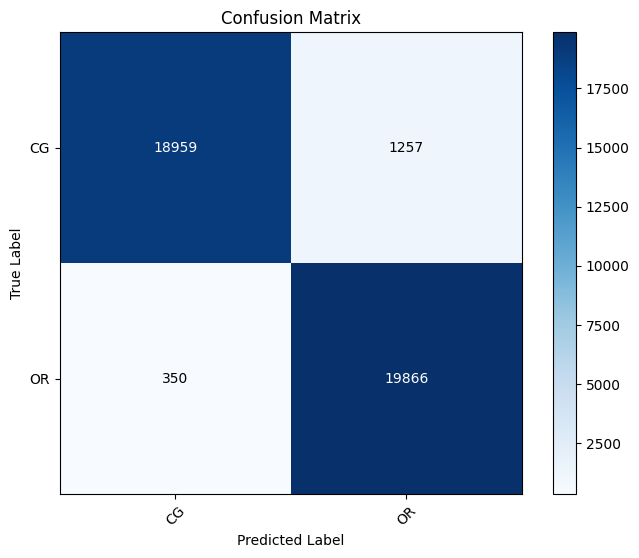

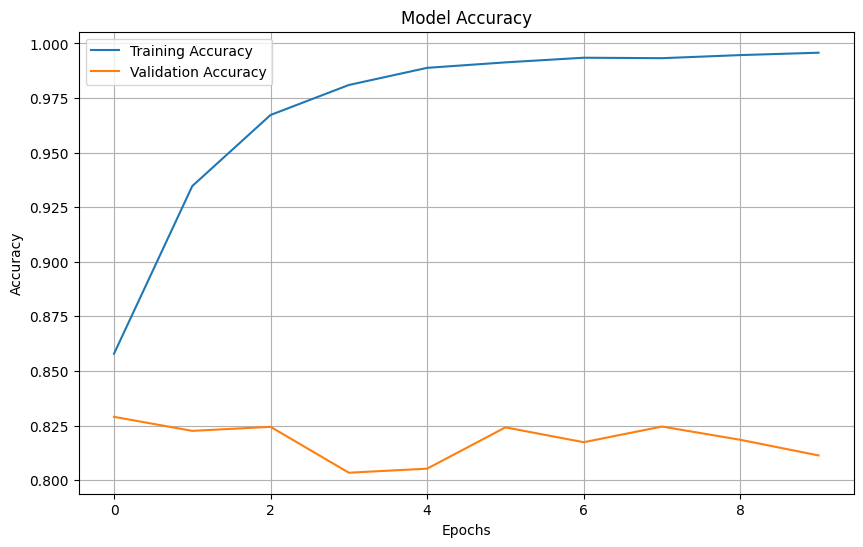

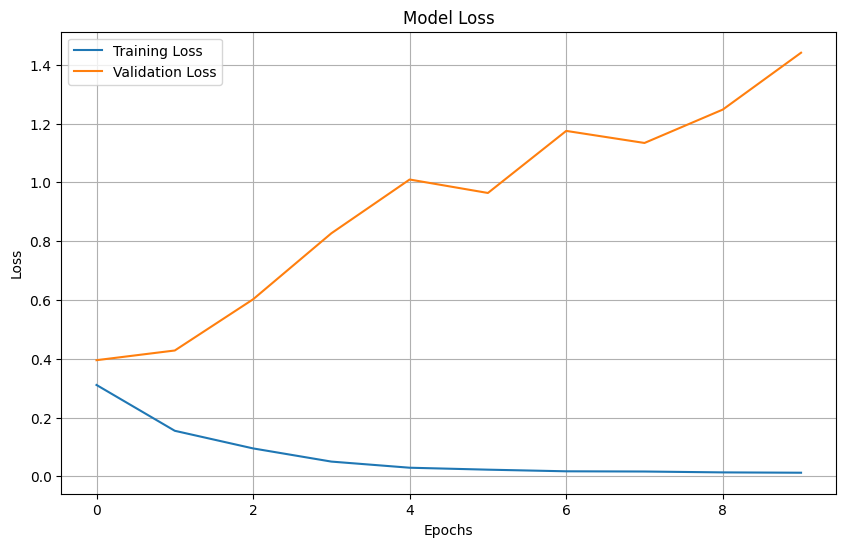

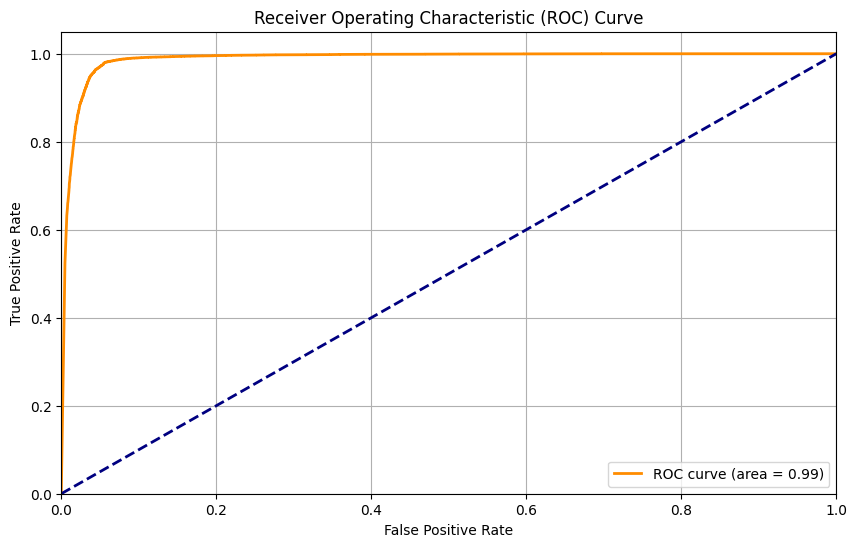

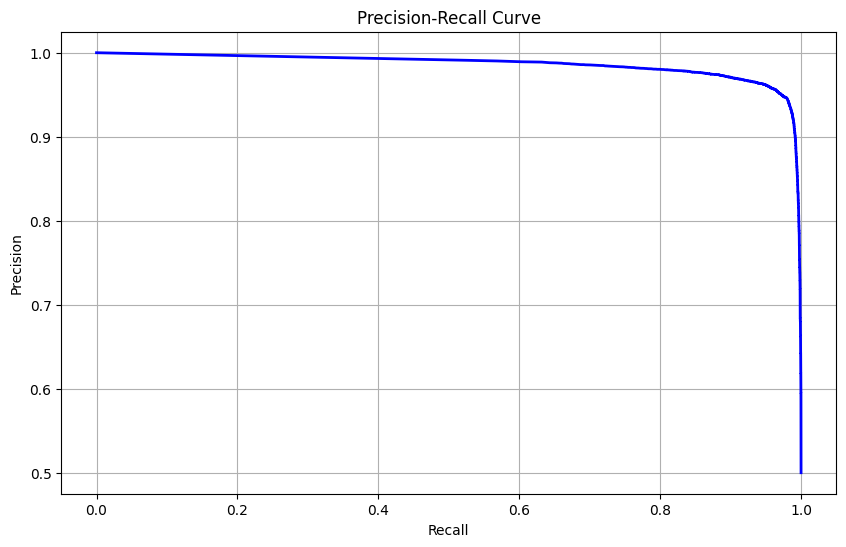

In [12]:
# Generate predictions for evaluation metrics
from sklearn.metrics import confusion_matrix
y_pred_probs = best_model.predict([padded_sequences, additional_features])
y_pred = np.argmax(y_pred_probs, axis=1)
y_true = np.argmax(binary_labels, axis=1)

# Confusion Matrix
cm = confusion_matrix(y_true, y_pred)

# Extracting values from confusion matrix
TN, FP, FN, TP = cm.ravel()

print(f'True Negatives (TN): {TN}')
print(f'False Positives (FP): {FP}')
print(f'False Negatives (FN): {FN}')
print(f'True Positives (TP): {TP}')

# Plot Confusion Matrix
plt.figure(figsize=(8, 6))
plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Blues)
plt.title('Confusion Matrix')
plt.colorbar()
tick_marks = np.arange(len(label_encoder.classes_))
plt.xticks(tick_marks, label_encoder.classes_, rotation=45)
plt.yticks(tick_marks, label_encoder.classes_)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')

for i in range(cm.shape[0]):
    for j in range(cm.shape[1]):
        plt.text(j, i, cm[i, j], ha='center', va='center',
                 color='white' if cm[i, j] > cm.max() / 2. else 'black')
plt.grid(False)
plt.show()

# Plot Accuracy over Epochs
plt.figure(figsize=(10, 6))
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)
plt.show()

# Plot Loss over Epochs
plt.figure(figsize=(10, 6))
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)
plt.show()

# ROC Curve
fpr, tpr, _ = roc_curve(y_true, y_pred_probs[:, 1])
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(10, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.grid(True)
plt.show()

# Precision-Recall Curve
precision, recall, _ = precision_recall_curve(y_true, y_pred_probs[:, 1])

plt.figure(figsize=(10, 6))
plt.plot(recall, precision, color='blue', lw=2)
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.grid(True)
plt.show()

In [ ]:
import matplotlib.pyplot as plt
from tensorflow.keras.layers import Input, Embedding, Conv1D, MaxPooling1D, Flatten, Concatenate, Dense, Dropout, BatchNormalization
from tensorflow.keras.models import Model
from tensorflow.keras.regularizers import l2
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau

def build_final_model_with_optimizations(params):
    # Text input
    text_input = Input(shape=(900,), name='text_input')
    embedding_layer = Embedding(input_dim=10000, output_dim=params['embedding_dim'])(text_input)
    conv_layer = Conv1D(filters=params['filters'], kernel_size=params['kernel_size'], activation='relu')(embedding_layer)
    pooling_layer = MaxPooling1D(pool_size=2)(conv_layer)
    dropout_layer_1 = Dropout(0.6)(pooling_layer)  # Increased dropout rate
    flatten_layer = Flatten()(dropout_layer_1)

    # Additional features input
    features_input = Input(shape=(2,), name='features_input')

    # Concatenate text and additional features
    concatenated = Concatenate()([flatten_layer, features_input])

    # Dense layers with regularization and dropout
    dense_layer_1 = Dense(params['dense_neurons'], activation='relu', kernel_regularizer=l2(0.05))(concatenated)  # Increased L2 regularization
    batch_norm_layer_1 = BatchNormalization()(dense_layer_1)
    dropout_layer_2 = Dropout(0.6)(batch_norm_layer_1)  # Increased dropout rate

    dense_layer_2 = Dense(40, activation='relu', kernel_regularizer=l2(0.03))(dropout_layer_2)
    batch_norm_layer_2 = BatchNormalization()(dense_layer_2)
    dropout_layer_3 = Dropout(0.6)(batch_norm_layer_2)  # Increased dropout rate

    dense_layer_3 = Dense(40, activation='relu', kernel_regularizer=l2(0.03))(dropout_layer_3)  # Additional dense layer
    batch_norm_layer_3 = BatchNormalization()(dense_layer_3)
    dropout_layer_4 = Dropout(0.6)(batch_norm_layer_3)  # Increased dropout rate

    output_layer = Dense(2, activation='softmax')(dropout_layer_4)

    # Create model
    model = Model(inputs=[text_input, features_input], outputs=output_layer)
    model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

    # Callbacks for early stopping and learning rate reduction
    early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)
    lr_reduction = ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=5, min_lr=0.001)

    return model, [early_stopping, lr_reduction]


Epoch 1/10
1011/1011 [==============================] - 43s 38ms/step - loss: 1.7833 - accuracy: 0.5435 - val_loss: 0.7547 - val_accuracy: 0.7440 - lr: 0.0010
Epoch 2/10
1011/1011 [==============================] - 15s 15ms/step - loss: 0.5387 - accuracy: 0.8405 - val_loss: 0.5531 - val_accuracy: 0.8065 - lr: 0.0010
Epoch 3/10
1011/1011 [==============================] - 12s 12ms/step - loss: 0.4134 - accuracy: 0.8895 - val_loss: 0.5681 - val_accuracy: 0.8072 - lr: 0.0010
Epoch 4/10
1011/1011 [==============================] - 11s 11ms/step - loss: 0.3773 - accuracy: 0.9056 - val_loss: 0.6193 - val_accuracy: 0.8022 - lr: 0.0010
Epoch 5/10
1011/1011 [==============================] - 10s 10ms/step - loss: 0.3501 - accuracy: 0.9201 - val_loss: 0.6590 - val_accuracy: 0.7887 - lr: 0.0010
Epoch 6/10
1011/1011 [==============================] - 10s 10ms/step - loss: 0.3406 - accuracy: 0.9258 - val_loss: 0.6448 - val_accuracy: 0.8092 - lr: 0.0010
Epoch 7/10
1264/1264 [========================

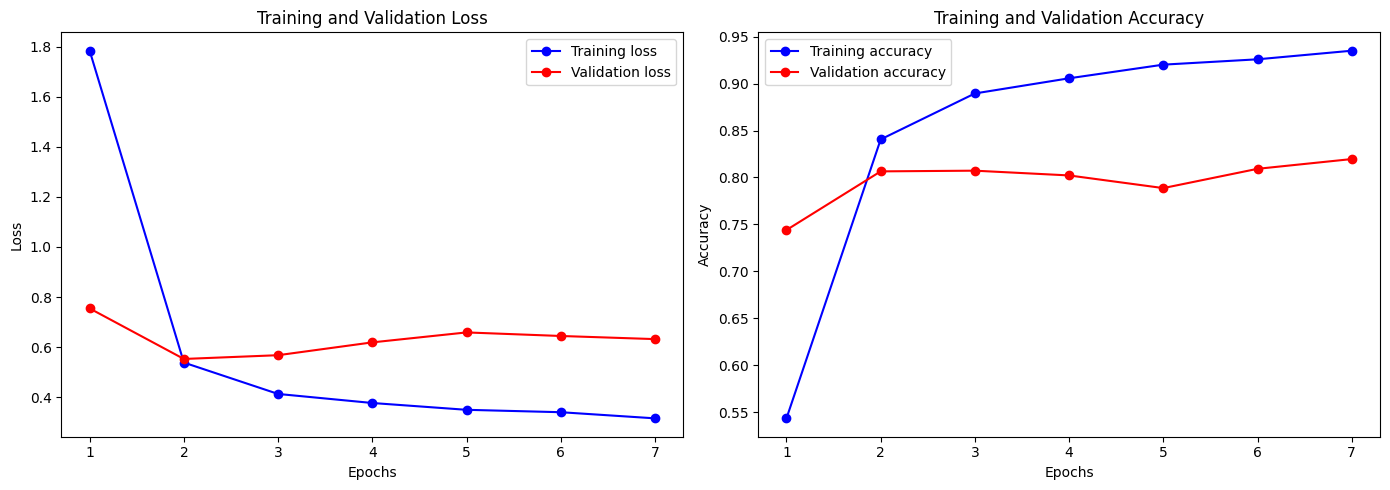

In [ ]:
# parameters, adjusted best hyperparameters
best_params = {
    'embedding_dim': 128,
    'filters': 64,
    'kernel_size': 5,
    'dense_neurons': 40
}

# Create the model with best hyperparameters and callbacks
final_model, callbacks = build_final_model_with_optimizations(best_params)

# Training the final model
history = final_model.fit(
    [padded_sequences, additional_features],
    binary_labels,
    epochs=10,
    batch_size=32,
    validation_split=0.2,
    callbacks=callbacks,  # Adding early stopping and learning rate reduction callbacks
    verbose=1
)

# Evaluate the final model
final_evaluation = final_model.evaluate([padded_sequences, additional_features], binary_labels)
print(f"Final Model evaluation - Loss: {final_evaluation[0]}, Accuracy: {final_evaluation[1]}")

# Plot training & validation loss and accuracy
def plot_metrics(history):
    # Extract loss and accuracy metrics
    loss = history.history['loss']
    val_loss = history.history['val_loss']
    accuracy = history.history['accuracy']
    val_accuracy = history.history['val_accuracy']
    epochs = range(1, len(loss) + 1)

    # Plot Loss
    plt.figure(figsize=(14, 5))

    plt.subplot(1, 2, 1)
    plt.plot(epochs, loss, 'bo-', label='Training loss')
    plt.plot(epochs, val_loss, 'ro-', label='Validation loss')
    plt.title('Training and Validation Loss')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()

    # Plot Accuracy
    plt.subplot(1, 2, 2)
    plt.plot(epochs, accuracy, 'bo-', label='Training accuracy')
    plt.plot(epochs, val_accuracy, 'ro-', label='Validation accuracy')
    plt.title('Training and Validation Accuracy')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.legend()

    # Show plots
    plt.tight_layout()
    plt.show()

# Call the plot function
plot_metrics(history)


In [ ]:
import pandas as pd
import numpy as np
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Embedding, Conv1D, MaxPooling1D, Flatten, Dense, Dropout, BatchNormalization, Concatenate
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt
from tensorflow.keras.regularizers import l2
# Load dataset

# read csv file dataset
df = pd.read_csv(file_path)

# Preprocessing
X_text = df['text_'].astype(str).values
X_additional_features = df[['rating']].values
y = df['label'].values

# Encode labels
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)

# Tokenize text
tokenizer = Tokenizer(num_words=10000)
tokenizer.fit_on_texts(X_text)
X_sequences = tokenizer.texts_to_sequences(X_text)
X_padded = pad_sequences(X_sequences, maxlen=900)

# Train-test split
X_train_text, X_val_text, X_train_features, X_val_features, y_train, y_val = train_test_split(X_padded, X_additional_features, y_encoded, test_size=0.2, random_state=42)

Epoch 1/20
506/506 [==============================] - 38s 67ms/step - loss: 8.9496 - accuracy: 0.4982 - val_loss: 5.7409 - val_accuracy: 0.5034 - lr: 2.0000e-04
Epoch 2/20
506/506 [==============================] - 15s 31ms/step - loss: 4.5028 - accuracy: 0.5034 - val_loss: 3.2558 - val_accuracy: 0.5033 - lr: 2.0000e-04
Epoch 3/20
506/506 [==============================] - 11s 21ms/step - loss: 2.8175 - accuracy: 0.5022 - val_loss: 2.2487 - val_accuracy: 0.5039 - lr: 2.0000e-04
Epoch 4/20
506/506 [==============================] - 10s 20ms/step - loss: 1.9585 - accuracy: 0.5021 - val_loss: 1.5770 - val_accuracy: 0.5034 - lr: 2.0000e-04
Epoch 5/20
506/506 [==============================] - 8s 16ms/step - loss: 1.4230 - accuracy: 0.4985 - val_loss: 1.1949 - val_accuracy: 0.5034 - lr: 2.0000e-04
Epoch 6/20
506/506 [==============================] - 8s 17ms/step - loss: 1.0665 - accuracy: 0.5025 - val_loss: 0.9424 - val_accuracy: 0.5081 - lr: 2.0000e-04
Epoch 7/20
506/506 [================

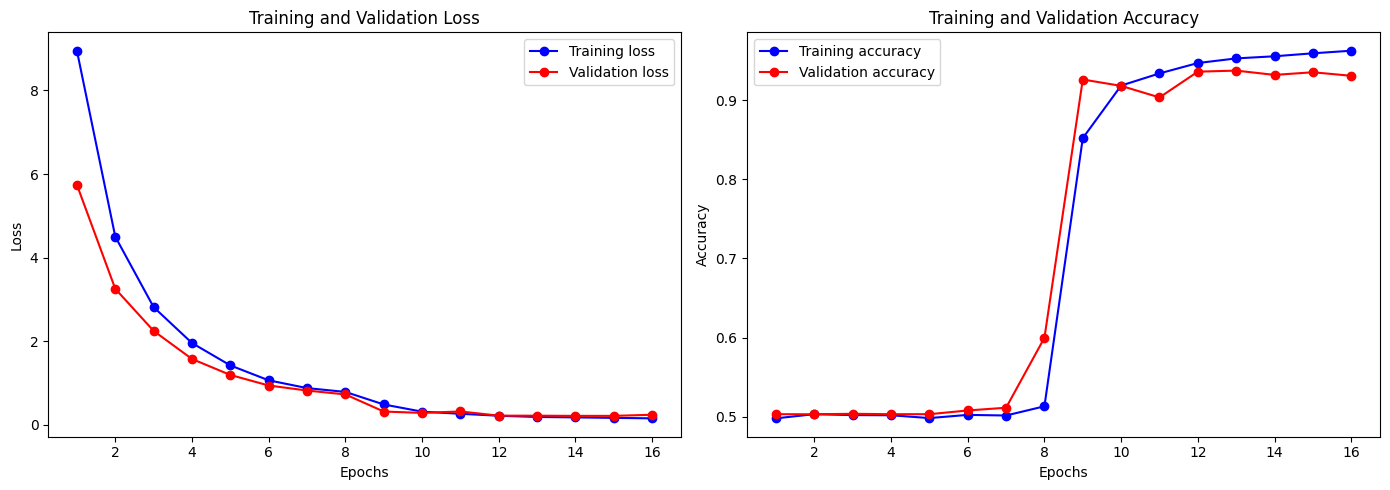

In [ ]:
# Define model parameters
params = {
    'embedding_dim': 128,
    'filters': 64,
    'kernel_size': 5,
    'dense_neurons': 64,
    'dropout_rate': 0.7,  # Slightly increased dropout rate
    'l2_reg': 0.04  # Further increased L2 regularization
}

# Build model
def build_cnn_model(params):
    # Text input
    text_input = Input(shape=(900,), name='text_input')
    embedding_layer = Embedding(input_dim=10000, output_dim=params['embedding_dim'])(text_input)
    conv_layer = Conv1D(filters=params['filters'], kernel_size=params['kernel_size'], activation='relu', kernel_regularizer=l2(params['l2_reg']))(embedding_layer)
    pooling_layer = MaxPooling1D(pool_size=2)(conv_layer)
    dropout_layer_1 = Dropout(params['dropout_rate'])(pooling_layer)
    flatten_layer = Flatten()(dropout_layer_1)

    # Additional features input
    features_input = Input(shape=(1,), name='features_input')

    # Concatenate text and additional features
    concatenated = Concatenate()([flatten_layer, features_input])

    # Dense layers with regularization and dropout
    dense_layer_1 = Dense(params['dense_neurons'], activation='relu', kernel_regularizer=l2(params['l2_reg']))(concatenated)
    batch_norm_layer_1 = BatchNormalization()(dense_layer_1)
    dropout_layer_2 = Dropout(params['dropout_rate'])(batch_norm_layer_1)

    dense_layer_2 = Dense(params['dense_neurons'], activation='relu', kernel_regularizer=l2(params['l2_reg']))(dropout_layer_2)
    batch_norm_layer_2 = BatchNormalization()(dense_layer_2)
    dropout_layer_3 = Dropout(params['dropout_rate'])(batch_norm_layer_2)

    dense_layer_3 = Dense(params['dense_neurons'], activation='relu', kernel_regularizer=l2(params['l2_reg']))(dropout_layer_3)
    batch_norm_layer_3 = BatchNormalization()(dense_layer_3)
    dropout_layer_4 = Dropout(params['dropout_rate'])(batch_norm_layer_3)

    output_layer = Dense(1, activation='sigmoid')(dropout_layer_4)

    # Create model
    model = Model(inputs=[text_input, features_input], outputs=output_layer)
    model.compile(optimizer=Adam(learning_rate=0.0002), loss='binary_crossentropy', metrics=['accuracy'])  # Further reduced learning rate

    # Callbacks for early stopping and learning rate reduction
    early_stopping = EarlyStopping(monitor='val_loss', patience=2, restore_best_weights=True)  # Further reduced patience
    lr_reduction = ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=1, min_lr=0.00001)

    return model, [early_stopping, lr_reduction]

# Create the model with specified parameters
cnn_model, callbacks = build_cnn_model(params)

# Train the model
history = cnn_model.fit(
    [X_train_text, X_train_features],
    y_train,
    epochs=20,
    batch_size=64,
    validation_data=([X_val_text, X_val_features], y_val),
    callbacks=callbacks,
    verbose=1
)

# Evaluate the model
final_evaluation = cnn_model.evaluate([X_val_text, X_val_features], y_val)
print(f"Final Model evaluation - Loss: {final_evaluation[0]}, Accuracy: {final_evaluation[1]}")

# Display overall accuracy
overall_accuracy = final_evaluation[1] * 100
print(f"Overall Accuracy: {overall_accuracy:.2f}%")

# Plot training & validation loss and accuracy
def plot_metrics(history):
    # Extract loss and accuracy metrics
    loss = history.history['loss']
    val_loss = history.history['val_loss']
    accuracy = history.history['accuracy']
    val_accuracy = history.history['val_accuracy']
    epochs = range(1, len(loss) + 1)

    # Plot Loss
    plt.figure(figsize=(14, 5))

    plt.subplot(1, 2, 1)
    plt.plot(epochs, loss, 'bo-', label='Training loss')
    plt.plot(epochs, val_loss, 'ro-', label='Validation loss')
    plt.title('Training and Validation Loss')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()

    # Plot Accuracy
    plt.subplot(1, 2, 2)
    plt.plot(epochs, accuracy, 'bo-', label='Training accuracy')
    plt.plot(epochs, val_accuracy, 'ro-', label='Validation accuracy')
    plt.title('Training and Validation Accuracy')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.legend()

    # Show plots
    plt.tight_layout()
    plt.show()

# Call the plot function
plot_metrics(history)

Epoch 1/20
506/506 [==============================] - 39s 71ms/step - loss: 6.7802 - accuracy: 0.5045 - val_loss: 3.8181 - val_accuracy: 0.5017 - lr: 2.5000e-04
Epoch 2/20
506/506 [==============================] - 18s 35ms/step - loss: 2.9942 - accuracy: 0.4992 - val_loss: 2.1531 - val_accuracy: 0.5023 - lr: 2.5000e-04
Epoch 3/20
506/506 [==============================] - 12s 23ms/step - loss: 1.8341 - accuracy: 0.5037 - val_loss: 1.4539 - val_accuracy: 0.5040 - lr: 2.5000e-04
Epoch 4/20
506/506 [==============================] - 9s 18ms/step - loss: 1.2894 - accuracy: 0.5052 - val_loss: 1.0860 - val_accuracy: 0.5026 - lr: 2.5000e-04
Epoch 5/20
506/506 [==============================] - 9s 18ms/step - loss: 1.0058 - accuracy: 0.5156 - val_loss: 0.8922 - val_accuracy: 0.5376 - lr: 2.5000e-04
Epoch 6/20
506/506 [==============================] - 8s 17ms/step - loss: 0.5581 - accuracy: 0.8411 - val_loss: 0.3871 - val_accuracy: 0.9096 - lr: 2.5000e-04
Epoch 7/20
506/506 [=================

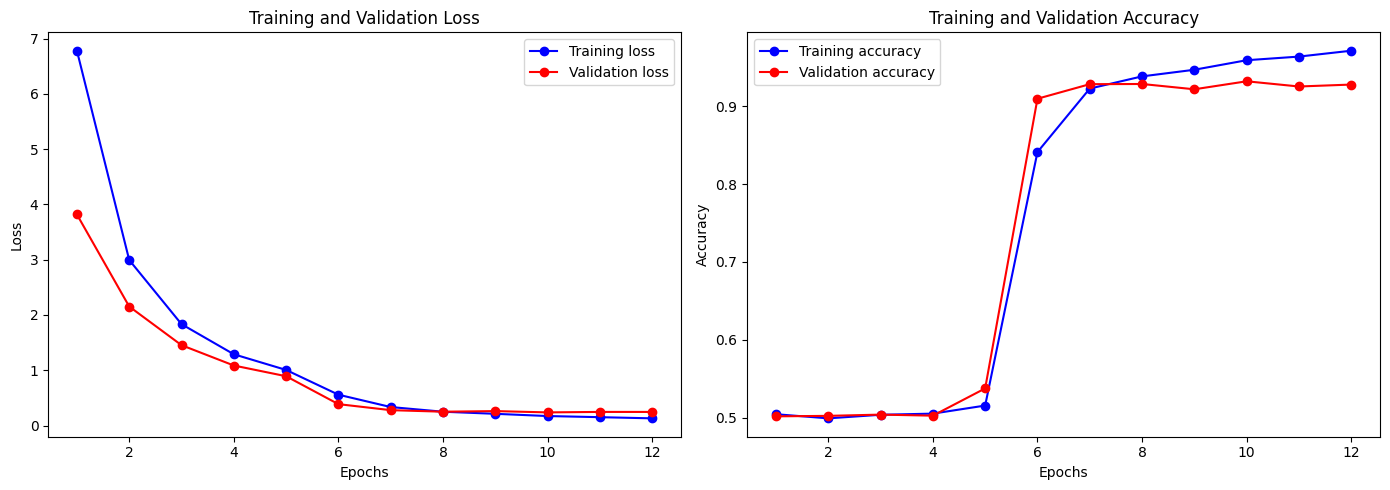

In [ ]:
# Define model parameters
params = {
    'embedding_dim': 128,
    'filters': 64,
    'kernel_size': 5,
    'dense_neurons': 64,
    'dropout_rate': 0.6,  # Slightly reduced dropout rate
    'l2_reg': 0.035  # Fine-tuned L2 regularization
}

# Build model
def build_cnn_model(params):
    # Text input
    text_input = Input(shape=(900,), name='text_input')
    embedding_layer = Embedding(input_dim=10000, output_dim=params['embedding_dim'])(text_input)
    conv_layer = Conv1D(filters=params['filters'], kernel_size=params['kernel_size'], activation='relu', kernel_regularizer=l2(params['l2_reg']))(embedding_layer)
    pooling_layer = MaxPooling1D(pool_size=2)(conv_layer)
    dropout_layer_1 = Dropout(params['dropout_rate'])(pooling_layer)
    flatten_layer = Flatten()(dropout_layer_1)

    # Additional features input
    features_input = Input(shape=(1,), name='features_input')

    # Concatenate text and additional features
    concatenated = Concatenate()([flatten_layer, features_input])

    # Dense layers with regularization and dropout
    dense_layer_1 = Dense(params['dense_neurons'], activation='relu', kernel_regularizer=l2(params['l2_reg']))(concatenated)
    batch_norm_layer_1 = BatchNormalization()(dense_layer_1)
    dropout_layer_2 = Dropout(params['dropout_rate'])(batch_norm_layer_1)

    dense_layer_2 = Dense(params['dense_neurons'], activation='relu', kernel_regularizer=l2(params['l2_reg']))(dropout_layer_2)
    batch_norm_layer_2 = BatchNormalization()(dense_layer_2)
    dropout_layer_3 = Dropout(params['dropout_rate'])(batch_norm_layer_2)

    dense_layer_3 = Dense(params['dense_neurons'], activation='relu', kernel_regularizer=l2(params['l2_reg']))(dropout_layer_3)
    batch_norm_layer_3 = BatchNormalization()(dense_layer_3)
    dropout_layer_4 = Dropout(params['dropout_rate'])(batch_norm_layer_3)

    output_layer = Dense(1, activation='sigmoid')(dropout_layer_4)

    # Create model
    model = Model(inputs=[text_input, features_input], outputs=output_layer)
    model.compile(optimizer=Adam(learning_rate=0.00025), loss='binary_crossentropy', metrics=['accuracy'])  # Slightly adjusted learning rate

    # Callbacks for early stopping and learning rate reduction
    early_stopping = EarlyStopping(monitor='val_loss', patience=2, restore_best_weights=True)
    lr_reduction = ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=1, min_lr=0.00001)

    return model, [early_stopping, lr_reduction]

# Create the model with specified parameters
cnn_model, callbacks = build_cnn_model(params)

# Train the model
history = cnn_model.fit(
    [X_train_text, X_train_features],
    y_train,
    epochs=20,
    batch_size=64,
    validation_data=([X_val_text, X_val_features], y_val),
    callbacks=callbacks,
    verbose=1
)

# Evaluate the model
final_evaluation = cnn_model.evaluate([X_val_text, X_val_features], y_val)
print(f"Final Model evaluation - Loss: {final_evaluation[0]}, Accuracy: {final_evaluation[1]}")

# Display overall accuracy
overall_accuracy = final_evaluation[1] * 100
print(f"Overall Accuracy: {overall_accuracy:.2f}%")

# Plot training & validation loss and accuracy
def plot_metrics(history):
    # Extract loss and accuracy metrics
    loss = history.history['loss']
    val_loss = history.history['val_loss']
    accuracy = history.history['accuracy']
    val_accuracy = history.history['val_accuracy']
    epochs = range(1, len(loss) + 1)

    # Plot Loss
    plt.figure(figsize=(14, 5))

    plt.subplot(1, 2, 1)
    plt.plot(epochs, loss, 'bo-', label='Training loss')
    plt.plot(epochs, val_loss, 'ro-', label='Validation loss')
    plt.title('Training and Validation Loss')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()

    # Plot Accuracy
    plt.subplot(1, 2, 2)
    plt.plot(epochs, accuracy, 'bo-', label='Training accuracy')
    plt.plot(epochs, val_accuracy, 'ro-', label='Validation accuracy')
    plt.title('Training and Validation Accuracy')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.legend()

    # Show plots
    plt.tight_layout()
    plt.show()

# Call the plot function
plot_metrics(history)

Training fold 1...
Epoch 1/20
506/506 [==============================] - 37s 68ms/step - loss: 6.4670 - accuracy: 0.5009 - val_loss: 3.6733 - val_accuracy: 0.4968 - lr: 2.5000e-04
Epoch 2/20
506/506 [==============================] - 16s 31ms/step - loss: 2.7701 - accuracy: 0.5039 - val_loss: 2.0224 - val_accuracy: 0.5151 - lr: 2.5000e-04
Epoch 3/20
506/506 [==============================] - 11s 21ms/step - loss: 1.7100 - accuracy: 0.5079 - val_loss: 1.3944 - val_accuracy: 0.6797 - lr: 2.5000e-04
Epoch 4/20
506/506 [==============================] - 9s 18ms/step - loss: 0.9115 - accuracy: 0.8318 - val_loss: 0.5613 - val_accuracy: 0.9222 - lr: 2.5000e-04
Epoch 5/20
506/506 [==============================] - 9s 17ms/step - loss: 0.4713 - accuracy: 0.9213 - val_loss: 0.3650 - val_accuracy: 0.9274 - lr: 2.5000e-04
Epoch 6/20
506/506 [==============================] - 8s 16ms/step - loss: 0.3108 - accuracy: 0.9360 - val_loss: 0.3591 - val_accuracy: 0.8951 - lr: 2.5000e-04
Epoch 7/20
506/506

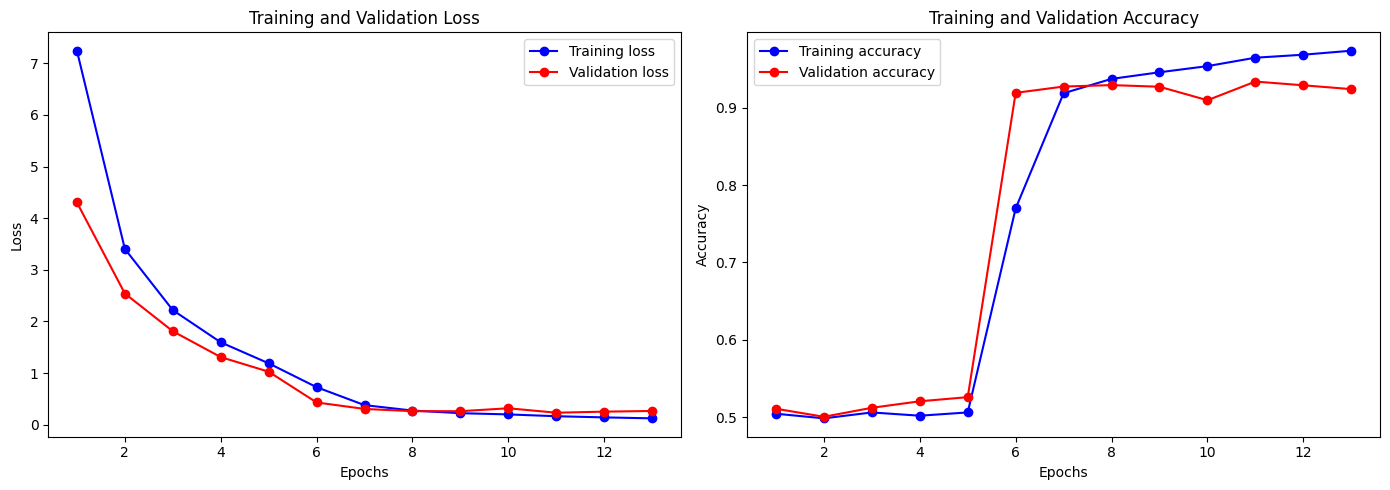

In [ ]:
import pandas as pd
import numpy as np
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Embedding, Conv1D, MaxPooling1D, Flatten, Dense, Dropout, BatchNormalization, Concatenate
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau
from tensorflow.keras.regularizers import l2
from sklearn.model_selection import KFold
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt


# read csv file dataset
df = pd.read_csv(file_path)

# Preprocessing
X_text = df['text_'].astype(str).values
X_additional_features = df[['rating']].values
y = df['label'].values

# Encode labels
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)

# Tokenize text
tokenizer = Tokenizer(num_words=10000)
tokenizer.fit_on_texts(X_text)
X_sequences = tokenizer.texts_to_sequences(X_text)
X_padded = pad_sequences(X_sequences, maxlen=900)

# Define model parameters
params = {
    'embedding_dim': 128,
    'filters': 64,
    'kernel_size': 5,
    'dense_neurons': 64,
    'dropout_rate': 0.6,
    'l2_reg': 0.035
}

# Build model function
def build_cnn_model(params):
    # Text input
    text_input = Input(shape=(900,), name='text_input')
    embedding_layer = Embedding(input_dim=10000, output_dim=params['embedding_dim'])(text_input)
    conv_layer = Conv1D(filters=params['filters'], kernel_size=params['kernel_size'], activation='relu', kernel_regularizer=l2(params['l2_reg']))(embedding_layer)
    pooling_layer = MaxPooling1D(pool_size=2)(conv_layer)
    dropout_layer_1 = Dropout(params['dropout_rate'])(pooling_layer)
    flatten_layer = Flatten()(dropout_layer_1)

    # Additional features input
    features_input = Input(shape=(1,), name='features_input')

    # Concatenate text and additional features
    concatenated = Concatenate()([flatten_layer, features_input])

    # Dense layers with regularization and dropout
    dense_layer_1 = Dense(params['dense_neurons'], activation='relu', kernel_regularizer=l2(params['l2_reg']))(concatenated)
    batch_norm_layer_1 = BatchNormalization()(dense_layer_1)
    dropout_layer_2 = Dropout(params['dropout_rate'])(batch_norm_layer_1)

    dense_layer_2 = Dense(params['dense_neurons'], activation='relu', kernel_regularizer=l2(params['l2_reg']))(dropout_layer_2)
    batch_norm_layer_2 = BatchNormalization()(dense_layer_2)
    dropout_layer_3 = Dropout(params['dropout_rate'])(batch_norm_layer_2)

    dense_layer_3 = Dense(params['dense_neurons'], activation='relu', kernel_regularizer=l2(params['l2_reg']))(dropout_layer_3)
    batch_norm_layer_3 = BatchNormalization()(dense_layer_3)
    dropout_layer_4 = Dropout(params['dropout_rate'])(batch_norm_layer_3)

    output_layer = Dense(1, activation='sigmoid')(dropout_layer_4)

    # Create model
    model = Model(inputs=[text_input, features_input], outputs=output_layer)
    model.compile(optimizer=Adam(learning_rate=0.00025), loss='binary_crossentropy', metrics=['accuracy'])

    # Callbacks for early stopping and learning rate reduction
    early_stopping = EarlyStopping(monitor='val_loss', patience=2, restore_best_weights=True)
    lr_reduction = ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=1, min_lr=0.00001)

    return model, [early_stopping, lr_reduction]

# K-Fold Cross-Validation
k = 5
kf = KFold(n_splits=k, shuffle=True, random_state=42)
fold_no = 1
val_accuracies = []

for train_index, val_index in kf.split(X_padded):
    X_train_text, X_val_text = X_padded[train_index], X_padded[val_index]
    X_train_features, X_val_features = X_additional_features[train_index], X_additional_features[val_index]
    y_train, y_val = y_encoded[train_index], y_encoded[val_index]

    cnn_model, callbacks = build_cnn_model(params)

    print(f'Training fold {fold_no}...')
    history = cnn_model.fit(
        [X_train_text, X_train_features],
        y_train,
        epochs=20,
        batch_size=64,
        validation_data=([X_val_text, X_val_features], y_val),
        callbacks=callbacks,
        verbose=1
    )

    # Evaluate the model
    final_evaluation = cnn_model.evaluate([X_val_text, X_val_features], y_val)
    val_accuracies.append(final_evaluation[1])
    print(f'Fold {fold_no} - Loss: {final_evaluation[0]}, Accuracy: {final_evaluation[1]}')

    fold_no += 1

# Print overall average accuracy
average_accuracy = np.mean(val_accuracies) * 100
print(f'Overall Accuracy across {k} folds: {average_accuracy:.2f}%')

# Plot training & validation loss and accuracy for the last fold
def plot_metrics(history):
    # Extract loss and accuracy metrics
    loss = history.history['loss']
    val_loss = history.history['val_loss']
    accuracy = history.history['accuracy']
    val_accuracy = history.history['val_accuracy']
    epochs = range(1, len(loss) + 1)

    # Plot Loss
    plt.figure(figsize=(14, 5))

    plt.subplot(1, 2, 1)
    plt.plot(epochs, loss, 'bo-', label='Training loss')
    plt.plot(epochs, val_loss, 'ro-', label='Validation loss')
    plt.title('Training and Validation Loss')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()

    # Plot Accuracy
    plt.subplot(1, 2, 2)
    plt.plot(epochs, accuracy, 'bo-', label='Training accuracy')
    plt.plot(epochs, val_accuracy, 'ro-', label='Validation accuracy')
    plt.title('Training and Validation Accuracy')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.legend()

    # Show plots
    plt.tight_layout()
    plt.show()

# Call the plot function for the last fold
plot_metrics(history)

## ACO with CNN

In [ ]:
import numpy as np
import re
import random
import tensorflow as tf
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv1D, MaxPooling1D, Flatten, Dropout
from tensorflow.keras.optimizers import Adam



def load_and_preprocess_data(filepath):
    # Efficiently load CSV
    df = pd.read_csv(filepath)
    df = df.dropna(subset=['text_', 'label'])
    df['text'] = df['text_'].str.lower().apply(lambda x: re.sub(r'[^\w\s]', '', x))
    return df


# Apply TF-IDF vectorization
def vectorize_text(df):
    vectorizer = TfidfVectorizer(stop_words='english', max_features=1000)
    X = vectorizer.fit_transform(df['text']).toarray()
    return X, vectorizer

# Encode labels
def encode_labels(df):
    le = LabelEncoder()
    y = le.fit_transform(df['label'])
    return y, le

# Simplified ACO for feature selection
class AntColonyOptimizer:
    def __init__(self, n_ants=5, n_iterations=10, decay=0.6, alpha=0.5, beta=0.5):
        self.n_ants = n_ants
        self.n_iterations = n_iterations
        self.decay = decay
        self.alpha = alpha
        self.beta = beta

    def fit(self, X, y):
        n_features = X.shape[1]
        pheromone = np.ones((n_features,))
        best_features = None
        best_score = -np.inf

        for iteration in range(self.n_iterations):
            all_solutions = []
            all_scores = []

            for ant in range(self.n_ants):
                feature_indices = np.arange(n_features)
                probs = pheromone ** self.alpha
                probs /= probs.sum()
                selected = np.random.choice(feature_indices, size=int(n_features * 0.5), replace=False, p=probs)

                score = self.evaluate_solution(X[:, selected], y)
                all_solutions.append(selected)
                all_scores.append(score)

                if score > best_score:
                    best_score = score
                    best_features = selected

            pheromone = (1 - self.decay) * pheromone
            for i, score in enumerate(all_scores):
                pheromone[all_solutions[i]] += score

        return best_features

    def evaluate_solution(self, X, y):
        from sklearn.model_selection import cross_val_score
        from sklearn.linear_model import LogisticRegression
        classifier = LogisticRegression(max_iter=1000)
        score = cross_val_score(classifier, X, y, cv=5, scoring='accuracy').mean()
        return score

# Build CNN model
def build_cnn_model(input_shape):
    model = Sequential([
        Conv1D(16, kernel_size=3, activation='relu', input_shape=input_shape),
        MaxPooling1D(pool_size=2),
        Flatten(),
        Dense(16, activation='relu'),
        Dense(1, activation='sigmoid')
    ])
    model.compile(optimizer=Adam(learning_rate=0.05), loss='binary_crossentropy', metrics=['accuracy'])
    return model

# Train and evaluate model
def train_and_evaluate_model(X_train, X_test, y_train, y_test, selected_features):
    input_shape = (len(selected_features), 1)
    X_train_selected = X_train[:, selected_features].reshape(-1, len(selected_features), 1)
    X_test_selected = X_test[:, selected_features].reshape(-1, len(selected_features), 1)

    model = build_cnn_model(input_shape)

    history = model.fit(
        X_train_selected, y_train,
        epochs=10,
        batch_size=64,
        validation_split=0.2,
    )

    evaluation = model.evaluate(X_test_selected, y_test)
    print(f"Test Loss: {evaluation[0]}, Test Accuracy: {evaluation[1]}")

    return model, history

Epoch 1/10
405/405 [==============================] - 2s 4ms/step - loss: 0.5888 - accuracy: 0.6903 - val_loss: 0.5531 - val_accuracy: 0.7105
Epoch 2/10
405/405 [==============================] - 1s 3ms/step - loss: 0.5408 - accuracy: 0.7218 - val_loss: 0.5489 - val_accuracy: 0.7217
Epoch 3/10
405/405 [==============================] - 1s 3ms/step - loss: 0.5506 - accuracy: 0.7198 - val_loss: 0.5421 - val_accuracy: 0.7262
Epoch 4/10
405/405 [==============================] - 1s 3ms/step - loss: 0.5255 - accuracy: 0.7352 - val_loss: 0.5329 - val_accuracy: 0.7190
Epoch 5/10
405/405 [==============================] - 1s 3ms/step - loss: 0.5071 - accuracy: 0.7462 - val_loss: 0.5189 - val_accuracy: 0.7295
Epoch 6/10
405/405 [==============================] - 1s 3ms/step - loss: 0.4998 - accuracy: 0.7505 - val_loss: 0.5359 - val_accuracy: 0.7295
Epoch 7/10
405/405 [==============================] - 1s 4ms/step - loss: 0.5031 - accuracy: 0.7488 - val_loss: 0.5254 - val_accuracy: 0.7270
Epoch 

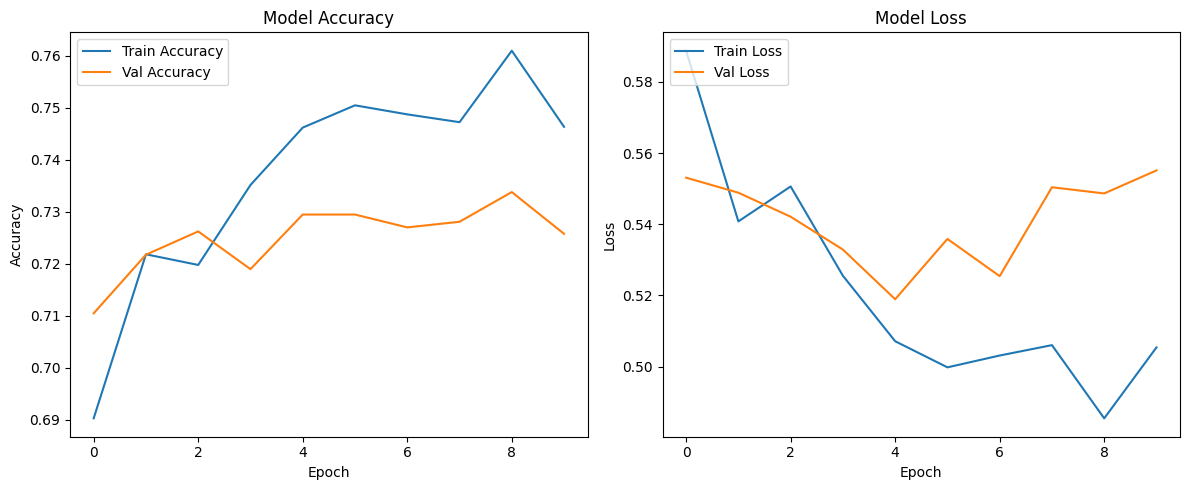

In [ ]:
# Main execution
def main():
    filepath = '/content/drive/My Drive/Colab dataset/fake reviews dataset.csv'
    df = load_and_preprocess_data(filepath)
    X, vectorizer = vectorize_text(df)
    y, le = encode_labels(df)
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

    aco = AntColonyOptimizer(n_ants=5, n_iterations=10)
    selected_features = aco.fit(X_train, y_train)

    model, history = train_and_evaluate_model(X_train, X_test, y_train, y_test, selected_features)

    import matplotlib.pyplot as plt
    plt.figure(figsize=(12, 5))

    # Plot training & validation accuracy values
    plt.subplot(1, 2, 1)
    plt.plot(history.history['accuracy'], label='Train Accuracy')
    plt.plot(history.history['val_accuracy'], label='Val Accuracy')
    plt.title('Model Accuracy')
    plt.ylabel('Accuracy')
    plt.xlabel('Epoch')
    plt.legend(loc='upper left')

    # Plot training & validation loss values
    plt.subplot(1, 2, 2)
    plt.plot(history.history['loss'], label='Train Loss')
    plt.plot(history.history['val_loss'], label='Val Loss')
    plt.title('Model Loss')
    plt.ylabel('Loss')
    plt.xlabel('Epoch')
    plt.legend(loc='upper left')

    plt.tight_layout()
    plt.show()

if __name__ == "__main__":
    main()